In [64]:
import numpy as np
import scipy.stats
import scipy.special
import scipy.integrate
import matplotlib.pyplot as plt

def B(s, b):
    return (np.pi/b)**0.5 * np.exp(s**2 / (2*b)) * (1 + scipy.special.erf(s/(2*b)**0.5))

def n_pk(z, s=None, R_2=1/2, gamma_2=1/2):
    if s is None:
        s = z
    return (np.exp(-s**2/(2 * gamma_2)) / (8 * np.pi**2 * R_2)) * (
        (1 - gamma_2)*s + 
        (s**2 - gamma_2*(1 + s**2))*B(s, 1) +
        B(s, 3 - 2 * gamma_2)
    )

def n_pk_above(z):
    return scipy.integrate.quad(n_pk, z, 15)[0]

N = 104

def N_noise(nu_th, dx, a=np.ones(N)):
    return scipy.stats.poisson((n_pk_above(nu_th) * (dx/a)**2).sum())

def N_signal(nu_th, nu, dx, a=1):
    p = 0.5 * scipy.special.erfc((nu_th - nu)/2**0.5) * scipy.special.erf((dx/a) * nu / 4)**2
    return scipy.stats.binom(N, p)

def N_sum(nu_th, nu, dx):
    p1 = N_noise(nu_th, dx)
    p2 = N_signal(nu_th, nu, dx)
    Z = sum([p1.pmf(n) + p2.pmf(n) for n in np.arange(N + 1)])
    

eps = 1/100
nu = 3
nu_th = 3
dx = 5
N_noise(nu_th, dx).isf(eps), N_signal(nu_th, nu, dx).isf(0.5)

(9.0, 52.0)

In [2]:
import emcee

In [59]:
n_pk_above(0) * (2048)*(4096) / (3)**2

54623.516114512924

In [60]:
N_t * n_pk_above(nu_th) * Omega / a**2

87699.07443349542

In [67]:
a_p = 5
dx_2 = 5
dx_1 = 1
nu = 2
(a_p**2 / n_pk_above(nu)) * (dx_2 / dx_1)**2

47957.301242348345

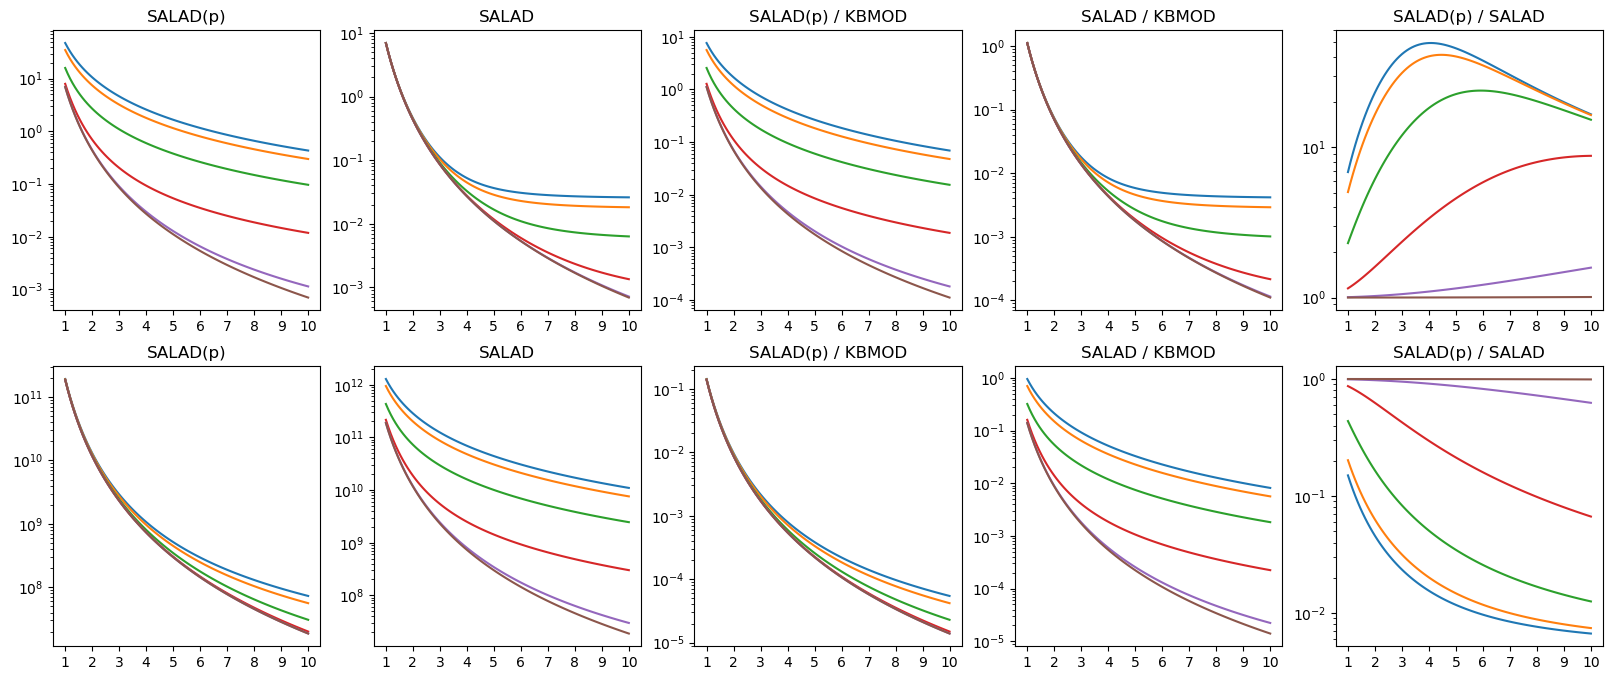

In [57]:
N_t = 100
nu_th = 0
p_s = 0.263
a = 1 # 1 arcsec seeing
Omega = (2048*p_s)*(4096*p_s) # 1 CCD in arcsec
dx = np.linspace(1, 10, 100) # bin width in arcsec
dt = 4 # hour
dv = 10 # arcsec / hour
v = (dt*dv/dx)**2
b = 8
N_results = 200

fig = plt.figure(figsize=[20, 8])
axs = fig.subplots(2, 5)

for nu_th in np.arange(0, 6, 1):
    images = N_t * (Omega / p_s**2)
    detection = (N_t * n_pk_above(nu_th) * Omega / a**2)
    projected = detection * v
    hough = (Omega / dx**2) * v
    
    cpu_salad_1 = projected + (N_results + 1) * hough
    cpu_salad_2 = (N_results + 1) * (projected + hough) # project every detection for each result
    cpu_kbmod = images * (dt*dv/np.ones_like(dx))**2
    
    mem_salad_1 = (detection + projected + hough) * b
    mem_salad_2 = (detection + hough) * b
    mem_kbmod = (images) * b * np.ones_like(dx)
    
    plt.sca(axs[0, 0])
    plt.plot(dx, mem_salad_1 / 2**30)
    plt.sca(axs[0, 1])
    plt.plot(dx, mem_salad_2 / 2**30)   
    plt.sca(axs[0, 2])
    plt.plot(dx, mem_salad_1 / mem_kbmod)
    plt.sca(axs[0, 3])
    plt.plot(dx, mem_salad_2 / mem_kbmod)
    plt.sca(axs[0, 4])
    plt.plot(dx, mem_salad_1 / mem_salad_2)
    
    plt.sca(axs[1, 0])
    plt.plot(dx, cpu_salad_1)
    plt.sca(axs[1, 1])
    plt.plot(dx, cpu_salad_2)   
    plt.sca(axs[1, 2])
    plt.plot(dx, cpu_salad_1 / cpu_kbmod)
    plt.sca(axs[1, 3])
    plt.plot(dx, cpu_salad_2 / cpu_kbmod)
    plt.sca(axs[1, 4])
    plt.plot(dx, cpu_salad_1 / cpu_salad_2)    
    
for ax in axs.flatten():
    plt.sca(ax)
    plt.yscale("log")
    plt.xticks(np.arange(1, 11))

plt.sca(axs[0, 0])
plt.title("SALAD(p)")
plt.sca(axs[0, 1])
plt.title("SALAD")
plt.sca(axs[0, 2])
plt.title("SALAD(p) / KBMOD")
plt.sca(axs[0, 3])
plt.title("SALAD / KBMOD")
plt.sca(axs[0, 4])
plt.title("SALAD(p) / SALAD")

plt.sca(axs[1, 0])
plt.title("SALAD(p)")
plt.sca(axs[1, 1])
plt.title("SALAD")
plt.sca(axs[1, 2])
plt.title("SALAD(p) / KBMOD")
plt.sca(axs[1, 3])
plt.title("SALAD / KBMOD")
plt.sca(axs[1, 4])
plt.title("SALAD(p) / SALAD")

plt.show()

In [61]:
(9/n_pk_above(3)) * (5/1)**2

148863.73301260002

In [3]:
N_noise(nu_th, dx)

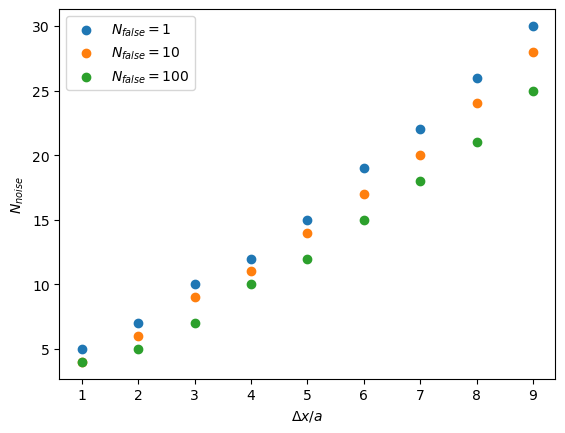

In [7]:
def fpr(N_f, dx, n_dir, om):
    return (dx**2) * N_f / (n_dir * om)


om = (2048*0.263)*(4096*0.263)
n_dir = 10
dx = 10
N_f = 1

dxs = np.arange(1, 10)
y1 = []
y2 = []
for N_f in [1, 10, 100]:
    
    y1 = []
    for dx in dxs:
        y1.append(N_noise(nu_th, dx).isf(fpr(N_f, dx, n_dir, om)))
    #     y2.append(N_noise(nu_th, dx).expect())

    plt.scatter(dxs, y1, label="$N_{false} = $" + str(N_f))
plt.xlabel("$\Delta x / a$")
plt.ylabel("$N_{noise}$")
# plt.scatter(dxs, y2)
plt.legend()
plt.show()


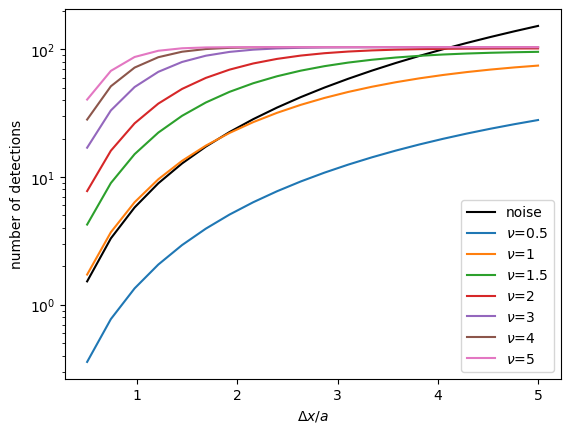

In [8]:
nu_th = 0
nu = 1.5
dxs = np.linspace(0.5, 5, 20)
y2 = []
for dx in dxs:
    p2 = N_noise(nu_th, dx)
#     y2.append([p2.isf(x) for x in [0.25, 0.5, 0.75]])
    y2.append([p2.expect()])

# plt.scatter(dxs, y1)
# plt.errorbar(dxs, [y[0] for y in y2], yerr=np.array([y[1:] for y in y1]).T, fmt='o', color='k', alpha=0.5)
plt.plot(dxs, [y[0] for y in y2], color='k', label="noise")

for nu in [0.5, 1, 1.5, 2, 3, 4, 5]:
    y1 = []
    for dx in dxs:
    #     y1.append(N_signal(nu_th, nu, dx).expect())
        p1 = N_signal(nu_th, nu, dx)
#         y1.append([p1.isf(x) for x in [0.25, 0.5, 0.75]])
        y1.append([p1.expect()])
#     plt.errorbar(
#         dxs, 
#         [y[0] for y in y1], yerr=np.array([y[1:] for y in y2]).T, 
#         fmt='o'
#     )
    plt.plot(dxs, [y[0] for y in y1], label=r'$\nu$='  + str(nu))

plt.xlabel("$\Delta x / a$")
plt.yscale("log")
plt.ylabel("number of detections")
plt.legend()
plt.show()
# N_signal(nu_th, nu, 10).expect()

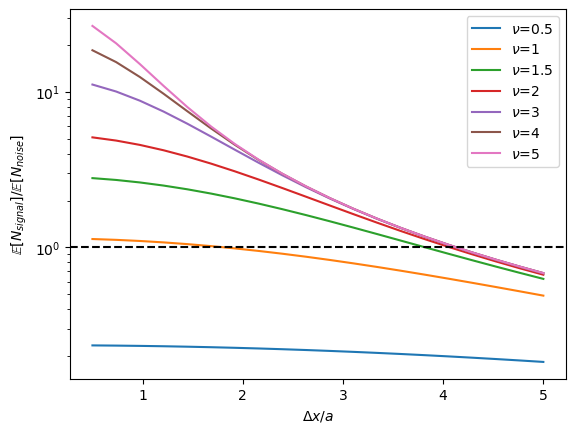

In [9]:
nu_th = 0
nu = 1.5
dxs = np.linspace(0.5, 5, 20)
y2 = []
for dx in dxs:
    p2 = N_noise(nu_th, dx)
#     y2.append([p2.isf(x) for x in [0.25, 0.5, 0.75]])
    y2.append([p2.expect()])

# plt.scatter(dxs, y1)
# plt.errorbar(dxs, [y[0] for y in y2], yerr=np.array([y[1:] for y in y1]).T, fmt='o', color='k', alpha=0.5)
# plt.plot(dxs, [y[0] for y in y2], color='k', label="noise")

for nu in [0.5, 1, 1.5, 2, 3, 4, 5]:
    y1 = []
    for dx in dxs:
    #     y1.append(N_signal(nu_th, nu, dx).expect())
        p1 = N_signal(nu_th, nu, dx)
#         y1.append([p1.isf(x) for x in [0.25, 0.5, 0.75]])
        y1.append([p1.expect()])
#     plt.errorbar(
#         dxs, 
#         [y[0] for y in y1], yerr=np.array([y[1:] for y in y2]).T, 
#         fmt='o'
#     )
    plt.plot(dxs, [y[0]/_y[0] for y, _y in zip(y1, y2)], label=r'$\nu$='  + str(nu))

plt.axhline(1, color='k', ls='--')
plt.xlabel("$\Delta x / a$")
plt.yscale("log")
plt.ylabel("$\mathbb{E}[N_{signal}] / \mathbb{E}[N_{noise}]$")
plt.legend()
plt.show()
# N_signal(nu_th, nu, 10).expect()

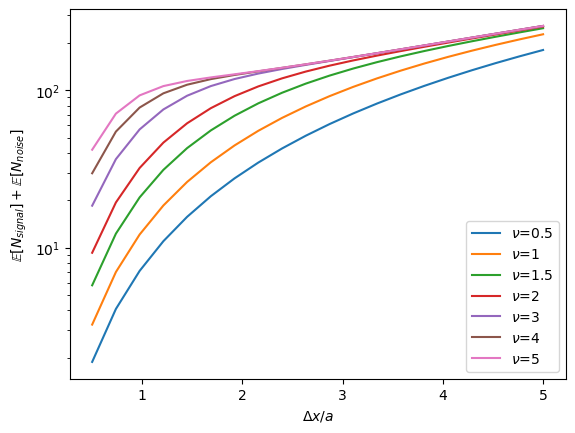

In [10]:
nu_th = 0
nu = 1.5
dxs = np.linspace(0.5, 5, 20)
y2 = []
for dx in dxs:
    p2 = N_noise(nu_th, dx)
#     y2.append([p2.isf(x) for x in [0.25, 0.5, 0.75]])
    y2.append([p2.expect()])

# plt.scatter(dxs, y1)
# plt.errorbar(dxs, [y[0] for y in y2], yerr=np.array([y[1:] for y in y1]).T, fmt='o', color='k', alpha=0.5)
# plt.plot(dxs, [y[0] for y in y2], color='k', label="noise")

for nu in [0.5, 1, 1.5, 2, 3, 4, 5]:
    y1 = []
    for dx in dxs:
    #     y1.append(N_signal(nu_th, nu, dx).expect())
        p1 = N_signal(nu_th, nu, dx)
#         y1.append([p1.isf(x) for x in [0.25, 0.5, 0.75]])
        y1.append([p1.expect()])
#     plt.errorbar(
#         dxs, 
#         [y[0] for y in y1], yerr=np.array([y[1:] for y in y2]).T, 
#         fmt='o'
#     )
    plt.plot(dxs, [y[0] + _y[0] for y, _y in zip(y1, y2)], label=r'$\nu$='  + str(nu))

# plt.axhline(1, color='k', ls='--')
plt.xlabel("$\Delta x / a$")
plt.yscale("log")
plt.ylabel("$\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}]$")
plt.legend()
plt.show()
# N_signal(nu_th, nu, 10).expect()

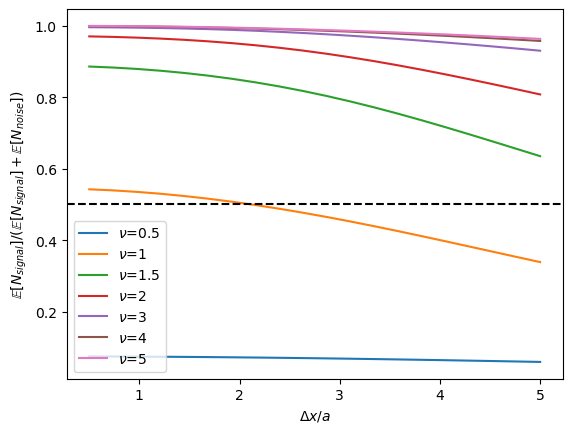

In [11]:
nu_th = 3
nu = 1.5
dxs = np.linspace(0.5, 5, 20)
y2 = []
for dx in dxs:
    p2 = N_noise(nu_th, dx)
#     y2.append([p2.isf(x) for x in [0.25, 0.5, 0.75]])
    y2.append([p2.expect()])

# plt.scatter(dxs, y1)
# plt.errorbar(dxs, [y[0] for y in y2], yerr=np.array([y[1:] for y in y1]).T, fmt='o', color='k', alpha=0.5)
# plt.plot(dxs, [y[0] for y in y2], color='k', label="noise")

for nu in [0.5, 1, 1.5, 2, 3, 4, 5]:
    y1 = []
    for dx in dxs:
    #     y1.append(N_signal(nu_th, nu, dx).expect())
        p1 = N_signal(nu_th, nu, dx)
#         y1.append([p1.isf(x) for x in [0.25, 0.5, 0.75]])
        y1.append([p1.expect()])
#     plt.errorbar(
#         dxs, 
#         [y[0] for y in y1], yerr=np.array([y[1:] for y in y2]).T, 
#         fmt='o'
#     )
    plt.plot(dxs, [y[0]/(y[0] + _y[0]) for y, _y in zip(y1, y2)], label=r'$\nu$='  + str(nu))

# plt.axhline(1, color='k', ls='--')
plt.axhline(0.5, color='k', ls='--')
plt.xlabel("$\Delta x / a$")
# plt.yscale("log")
plt.ylabel("$\mathbb{E}[N_{signal}] / (\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}])$")
plt.legend()
plt.show()
# N_signal(nu_th, nu, 10).expect()

In [118]:
24 - 5/2*np.log10(0.5/5)

26.5

In [121]:
24 + 5/2*np.log10(10)

26.5

In [87]:
# Now I want N_signal / N_noise
# and N_signal / (N_signal + N_noise)

In [153]:
N_noise(0, 5).expect()

152.37215484137525

In [12]:
dxs = np.linspace(0.5, 10, 40)
nus = [0.5, 1, 1.5, 2, 3, 4, 5]
nu_ths = [0, 1, 2, 3, 4, 5]

E_noise = {}
d_noise = {}
for nu_th in nu_ths:
    E_noise[nu_th] = []
    d_noise[nu_th] = []
    for dx in dxs:
        p2 = N_noise(nu_th, dx)
        E_noise[nu_th].append(p2.expect())
        d_noise[nu_th].append([p2.isf(x) for x in [0.25, 0.5, 0.75]])
    E_noise[nu_th] = np.array(E_noise[nu_th])
    d_noise[nu_th] = np.array(d_noise[nu_th])

E_signal = {}
d_signal = {}
for nu_th in nu_ths:
    E_signal[nu_th] = {}
    d_signal[nu_th] = {}
    for nu in nus:
        E_signal[nu_th][nu] = []
        d_signal[nu_th][nu] = []
        for dx in dxs:
            p1 = N_signal(nu_th, nu, dx)
            E_signal[nu_th][nu].append(p1.expect())
            d_signal[nu_th][nu].append([p1.isf(x) for x in [0.25, 0.5, 0.75]])
        E_signal[nu_th][nu] = np.array(E_signal[nu_th][nu])
        d_signal[nu_th][nu] = np.array(d_signal[nu_th][nu])



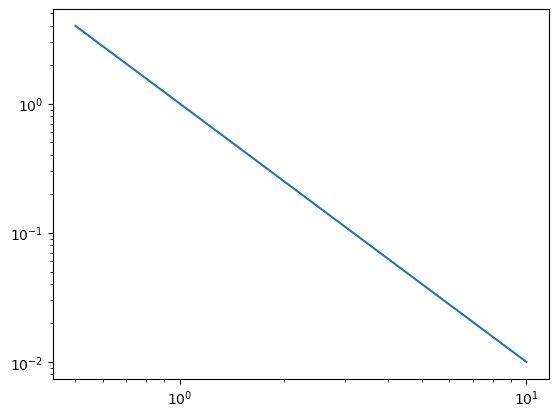

In [158]:
plt.plot(dxs, 1/dxs**2)
plt.yscale("log")
plt.xscale("log")
plt.show()

In [479]:
d_signal[0][1]

array([[ 2.,  2.,  1.],
       [ 5.,  4.,  2.],
       [ 8.,  6.,  5.],
       [12., 10.,  8.],
       [16., 14., 11.],
       [21., 18., 16.],
       [26., 23., 20.],
       [31., 28., 25.],
       [36., 33., 30.],
       [41., 38., 35.],
       [46., 43., 40.],
       [51., 48., 44.],
       [56., 52., 49.],
       [60., 57., 53.],
       [64., 61., 57.],
       [68., 64., 61.],
       [71., 68., 65.],
       [74., 71., 68.],
       [77., 73., 70.],
       [79., 76., 73.],
       [81., 78., 75.],
       [82., 80., 77.],
       [84., 81., 78.],
       [85., 82., 79.],
       [86., 83., 81.],
       [87., 84., 81.],
       [88., 85., 82.],
       [88., 85., 83.],
       [88., 86., 83.],
       [89., 86., 84.],
       [89., 87., 84.],
       [89., 87., 84.],
       [90., 87., 84.],
       [90., 87., 85.],
       [90., 87., 85.],
       [90., 87., 85.],
       [90., 87., 85.],
       [90., 87., 85.],
       [90., 88., 85.],
       [90., 88., 85.]])

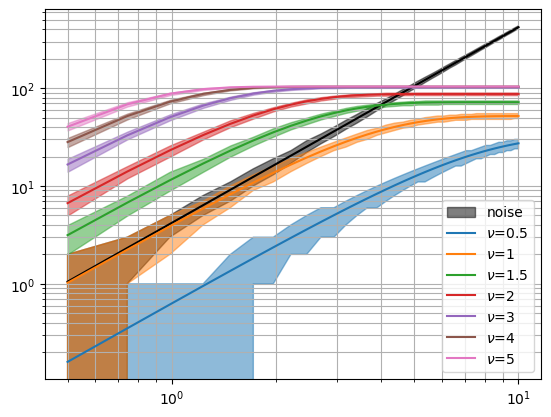

In [499]:
nu_th = 1
nu = 1.5

# plt.plot(dxs, [y[0] for y in d_noise[nu_th]], color='k', label="noise")
plt.plot(dxs, E_noise[nu_th], color='k')

plt.fill_between(
    dxs, 
    [y[2] for y in d_noise[nu_th]], 
    [y[0] for y in d_noise[nu_th]], 
    label="noise",
    color='k', alpha=0.5
)

for i, nu in enumerate(nus):
    plt.plot(
        dxs, 
        E_signal[nu_th][nu],
        label=r'$\nu$='  + str(nu),
        color=f'C{i}'
    )
    plt.fill_between(
        dxs, 
        [y[2] for y in d_signal[nu_th][nu]], 
        [y[0] for y in d_signal[nu_th][nu]], 
#         label=r'$\nu$='  + str(nu),
        color=f'C{i}', 
        alpha=0.5
    )

plt.grid(which='both')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

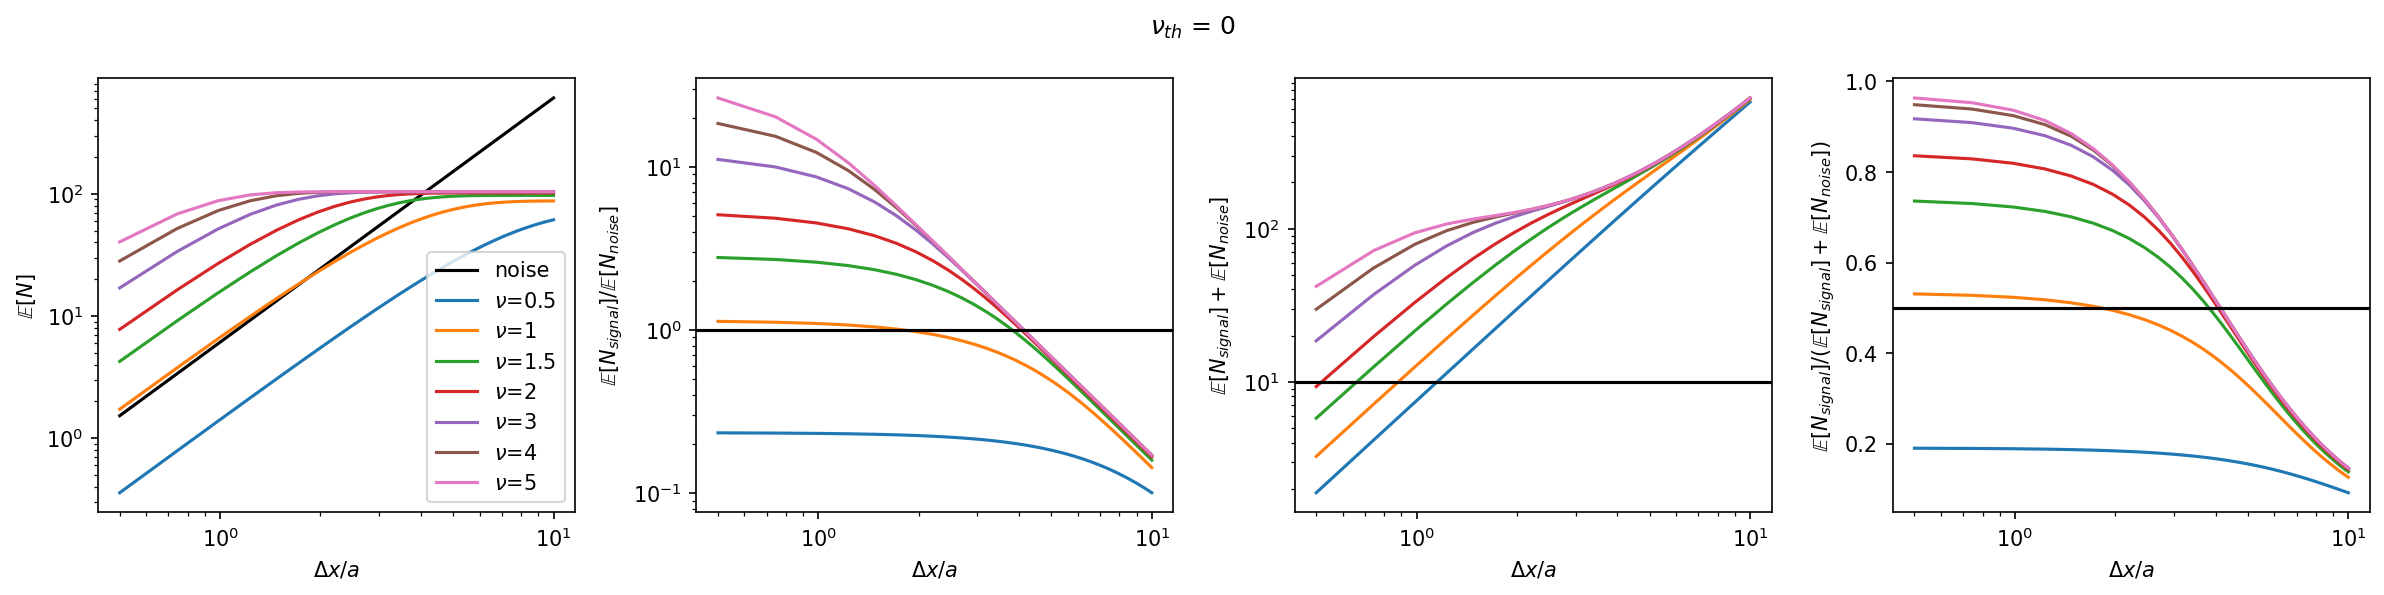

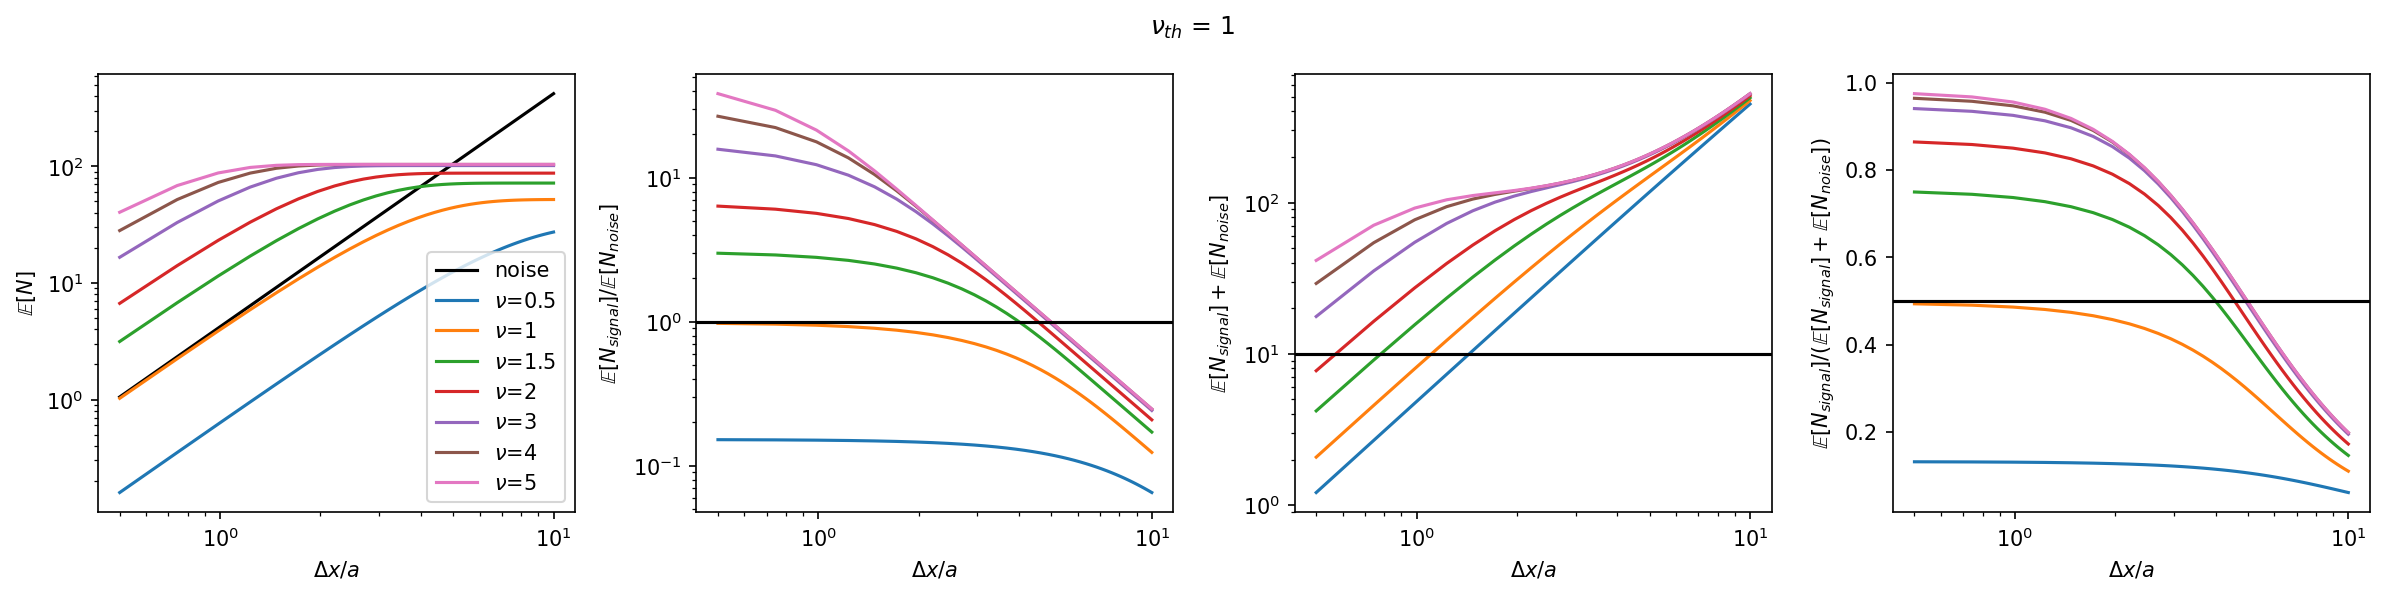

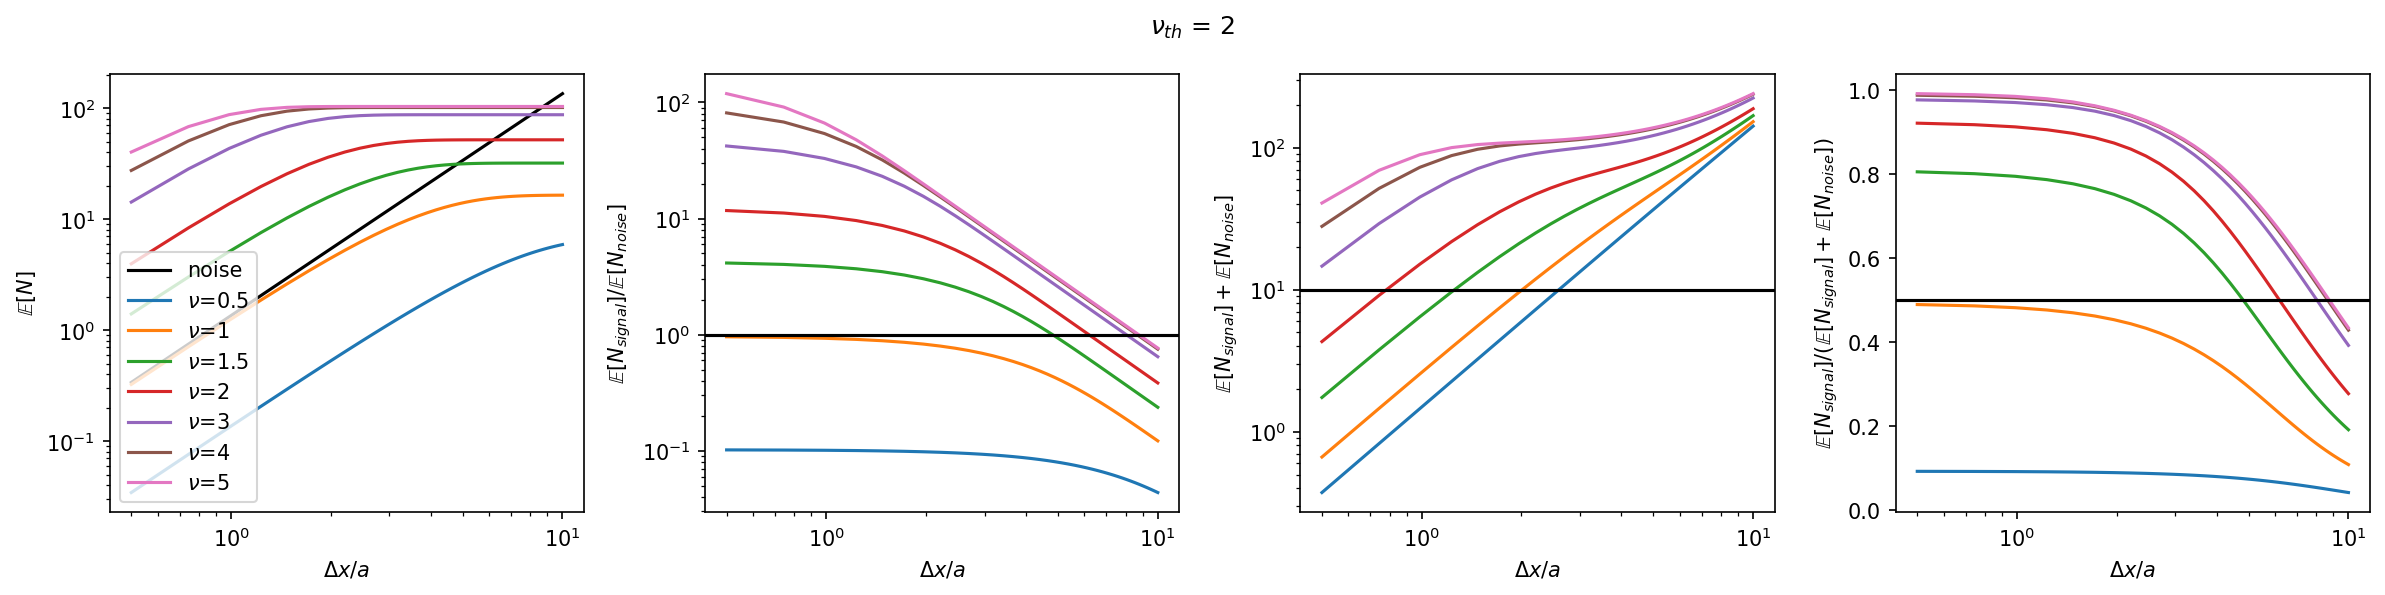

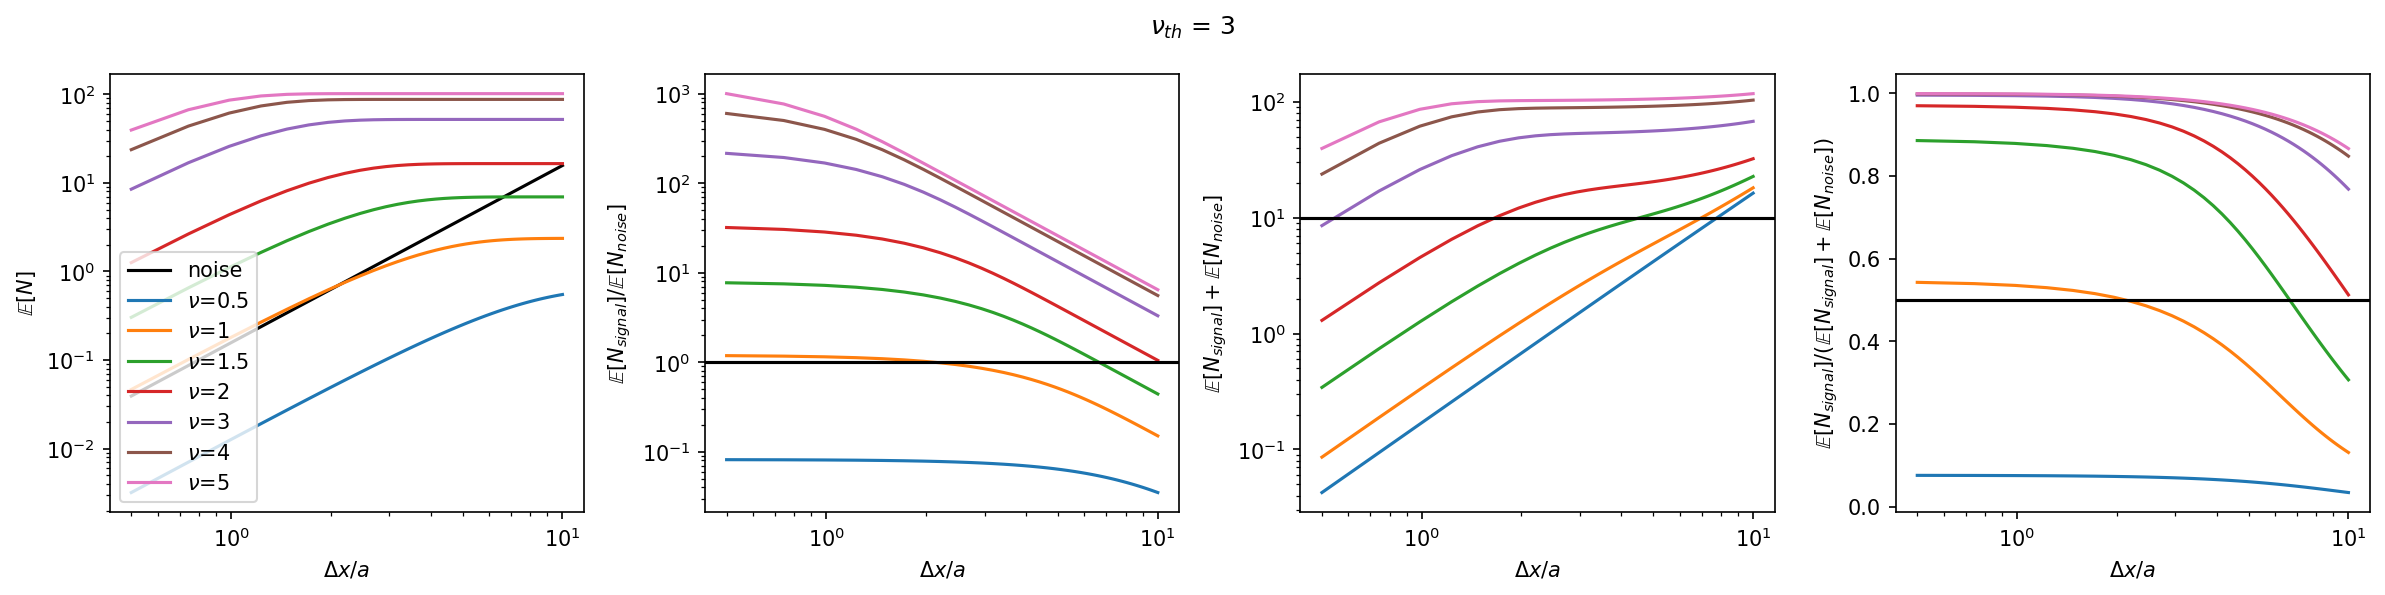

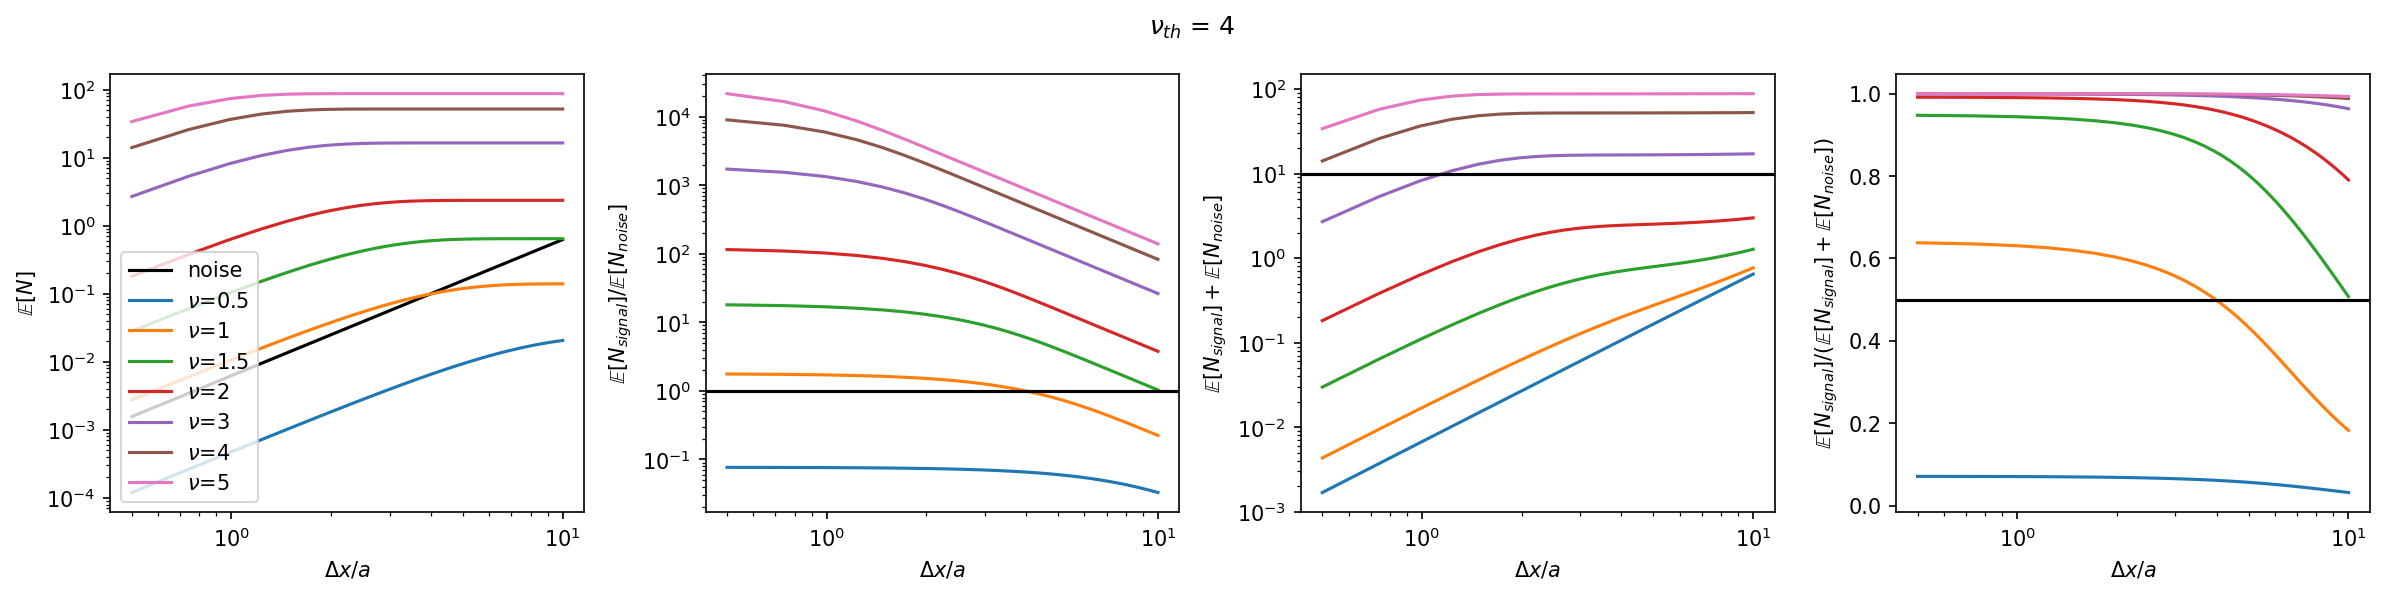

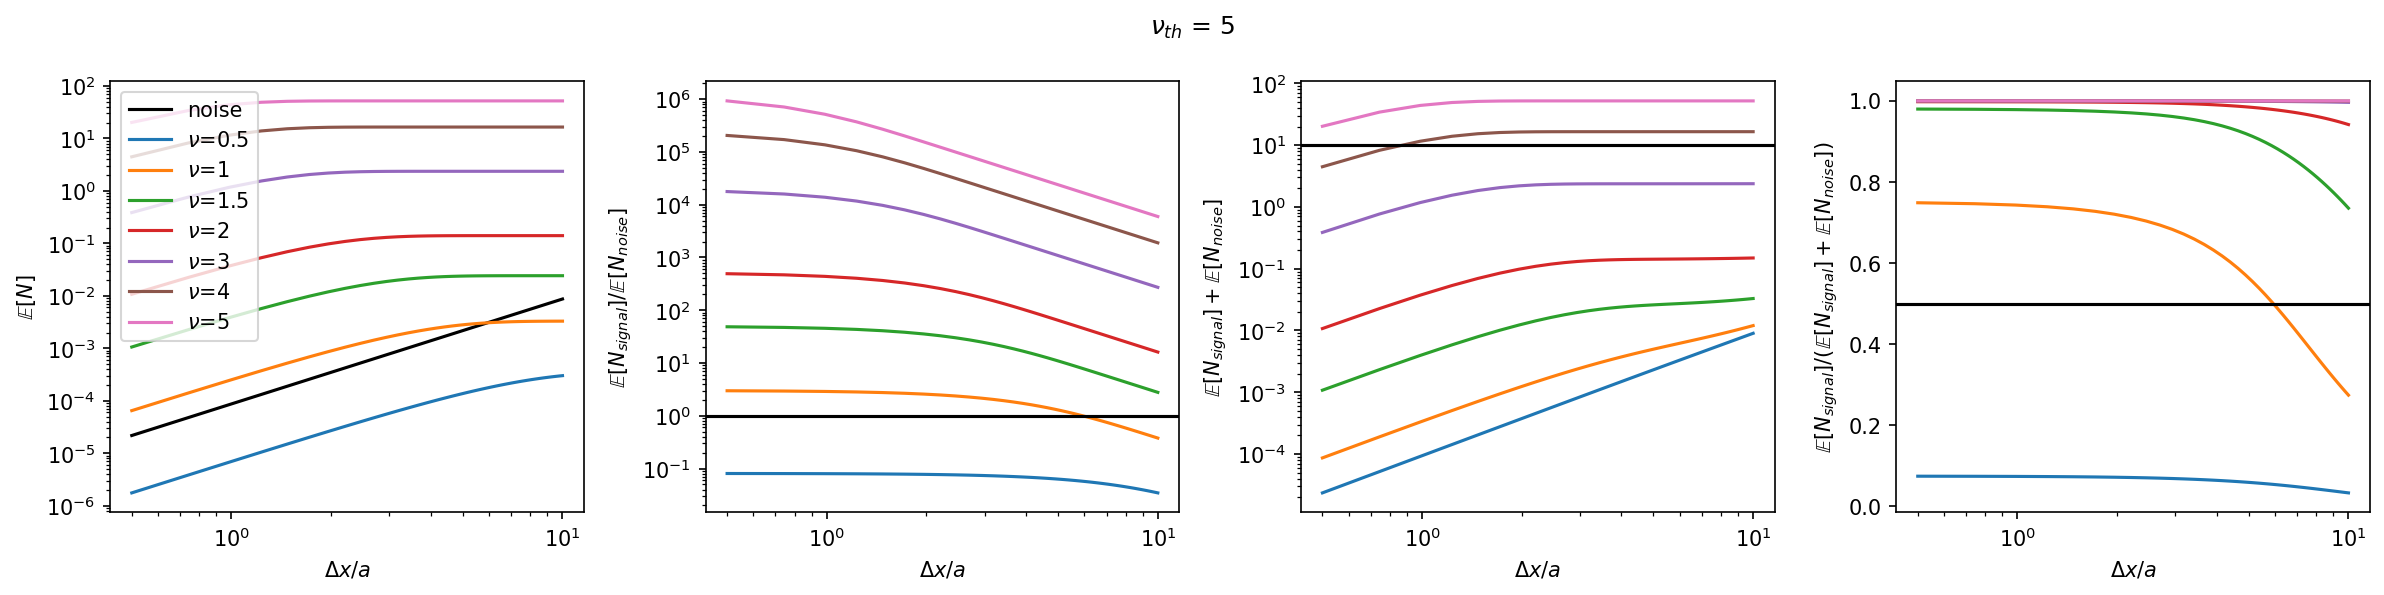

In [170]:
for nu_th in nu_ths:
    fig = plt.figure(dpi=150, figsize=[16, 4])
    axs = fig.subplots(1, 4, sharex=True)
    axs = axs.flatten()

    # number of detections
    plt.sca(axs[0])
    plt.plot(dxs, E_noise[nu_th], color='k', label="noise")
    for nu in nus:
        plt.plot(
            dxs, 
            E_signal[nu_th][nu], 
            label=r'$\nu$='  + str(nu)
        )

    plt.xlabel("$\Delta x / a$")
    plt.ylabel("$\mathbb{E}[N]$")
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    
#     ax = plt.twiny().twinx()
#     ax.plot(dxs, 1/dxs**2, color='k', ls='--') # N_false
#     ax.set_xticks([])
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.ylabel("$N_{false} / N_{false}(\Delta x = a)$")
    

    plt.sca(axs[1])
    for nu in nus:
        plt.plot(
            dxs, 
            E_signal[nu_th][nu] / E_noise[nu_th], 
            label=r'$\nu$='  + str(nu)
        )

    plt.xlabel("$\Delta x / a$")
    plt.ylabel("$\mathbb{E}[N_{signal}] / \mathbb{E}[N_{noise}]$")
    plt.yscale("log")
    plt.xscale("log")
    plt.axhline(1, color='k')
    
#     ax = plt.twiny().twinx()
#     ax.plot(dxs, 1/dxs**2, color='k', ls='--') # N_false
#     ax.set_xticks([])
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.ylabel("$N_{false} / N_{false}(\Delta x = a)$")

    plt.sca(axs[2])
    for nu in nus:
        plt.plot(
            dxs, 
            E_signal[nu_th][nu] + E_noise[nu_th], 
            label=r'$\nu$='  + str(nu)
        )

    plt.xlabel("$\Delta x / a$")
    plt.ylabel("$\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}]$")
    plt.yscale("log")
    plt.xscale("log")
    plt.axhline(10, color='k')
    
#     ax = plt.twiny().twinx()
#     ax.plot(dxs, 1/dxs**2, color='k', ls='--') # N_false
#     ax.set_xticks([])
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.ylabel("$N_{false} / N_{false}(\Delta x = a)$")

    plt.sca(axs[3])
    for nu in nus:
        plt.plot(
            dxs, 
            E_signal[nu_th][nu]/(E_signal[nu_th][nu] + E_noise[nu_th]), 
            label=r'$\nu$='  + str(nu)
        )

    plt.xlabel("$\Delta x / a$")
    plt.ylabel("$\mathbb{E}[N_{signal}] / (\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}])$")
    plt.axhline(0.5, color='k')
    plt.xscale("log")
    
#     ax = plt.twiny().twinx()
#     ax.plot(dxs, 1/dxs**2, color='k', ls='--') # N_false
#     ax.set_xticks([])
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.ylabel("$N_{false} / N_{false}(\Delta x = a)$")

    fig.suptitle(r"$\nu_{th}$ = " + str(nu_th))
    fig.tight_layout()
    plt.show()
#     break

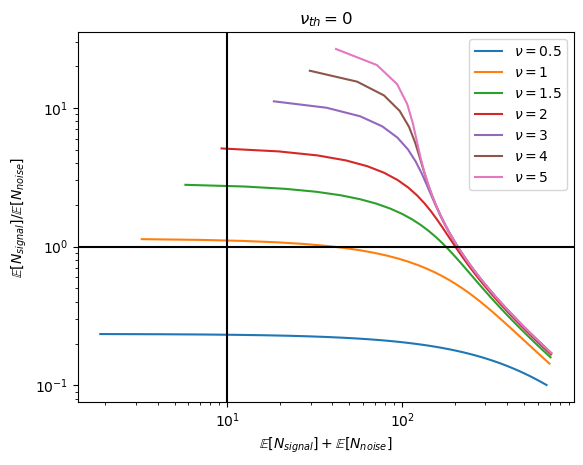

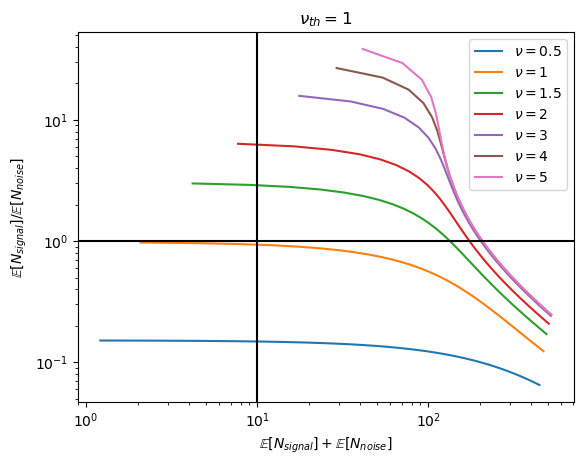

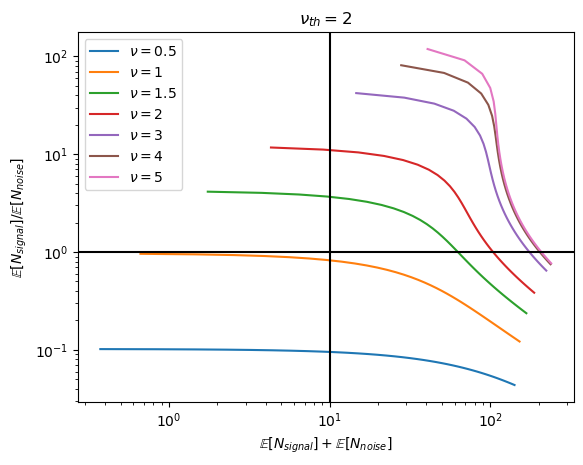

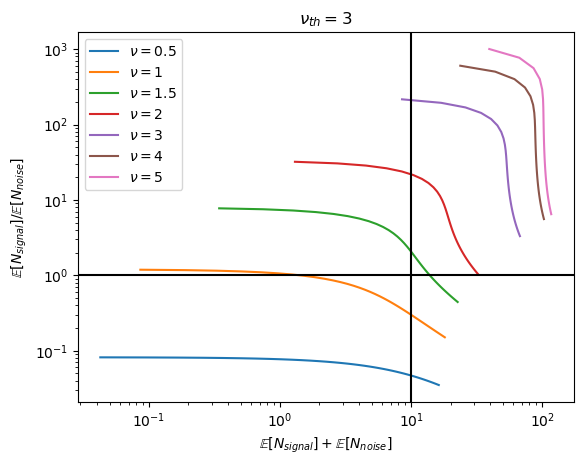

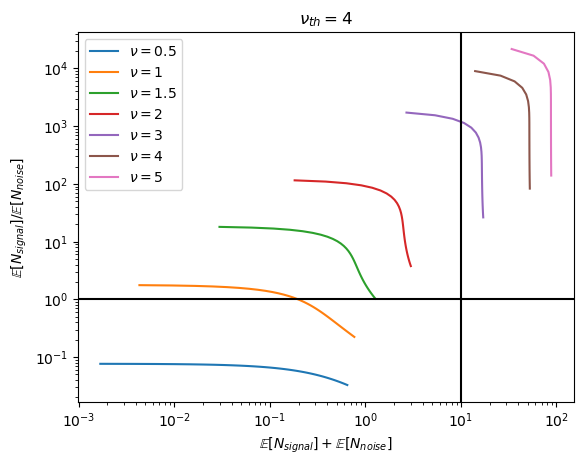

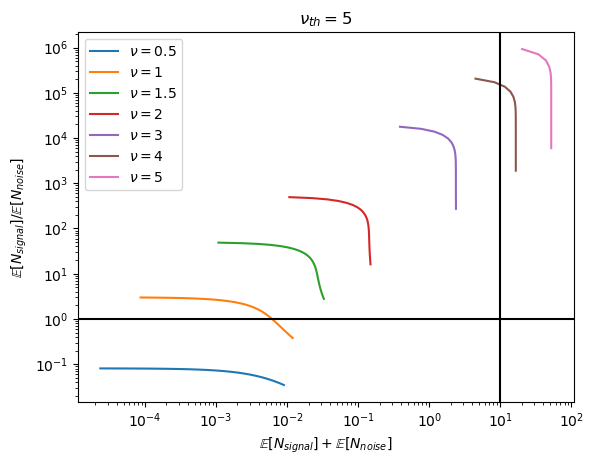

In [190]:
for nu_th in nu_ths:
    for nu in nus:
        plt.plot(
            E_signal[nu_th][nu] + E_noise[nu_th], 
            E_signal[nu_th][nu]/E_noise[nu_th], 
            label=r"$\nu = $" + str(nu)
        )

    plt.yscale("log")
    plt.ylabel("$\mathbb{E}[N_{signal}] / \mathbb{E}[N_{noise}]$")
    plt.axhline(1, color='k')
    
    plt.xlabel("$\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}]$")
    plt.xscale("log")
    plt.axvline(10, color='k')
    plt.title(r"$\nu_{th} = $" + str(nu_th))
    plt.legend()
    plt.show()

In [253]:
# number of false positives per dir per psf^2

# \eps = dx^2 Nf / (n_dir * om)
# Nf / (n_dir * om) = \eps / dx^2

# a^2 Nf / (n_dir * om) = a^2 \eps / dx^2
# Nf / (n_dir) * (a^2 / om) = \eps 1/(dx/a)^2
# N_f / (n_dir * )

# def fpr(N_f, dx, n_dir, om):
#     return (dx**2) * N_f / (n_dir * om)

def N_f(eps, dx):
    return eps * 1/dx**2

N_f(1/100, dxs) # number of false positives per number of stacks per number of psf^2

array([0.04      , 0.01808561, 0.01026143, 0.00660156, 0.00460038,
       0.00338828, 0.002599  , 0.00205652, 0.00166772, 0.00137959,
       0.00116016, 0.0009892 , 0.00085343, 0.0007438 , 0.00065402,
       0.00057956, 0.00051713, 0.00046427, 0.00041912, 0.00038025,
       0.00034655, 0.00031713, 0.00029131, 0.00026852, 0.0002483 ,
       0.00023028, 0.00021416, 0.00019967, 0.0001866 , 0.00017478,
       0.00016404, 0.00015427, 0.00014534, 0.00013716, 0.00012966,
       0.00012276, 0.00011639, 0.0001105 , 0.00010506, 0.0001    ])

In [ ]:
n_stacks ~ 

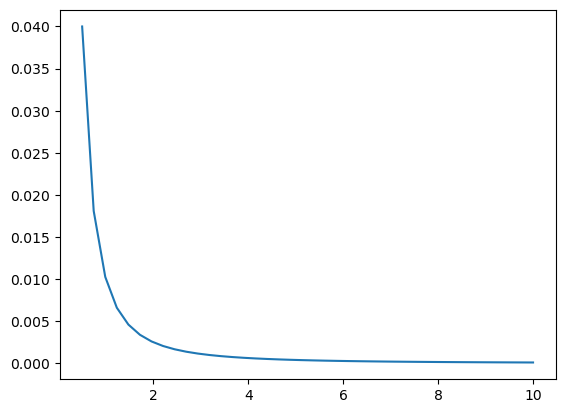

In [257]:
plt.plot(dxs, N_f(1/100, dxs))
plt.show()

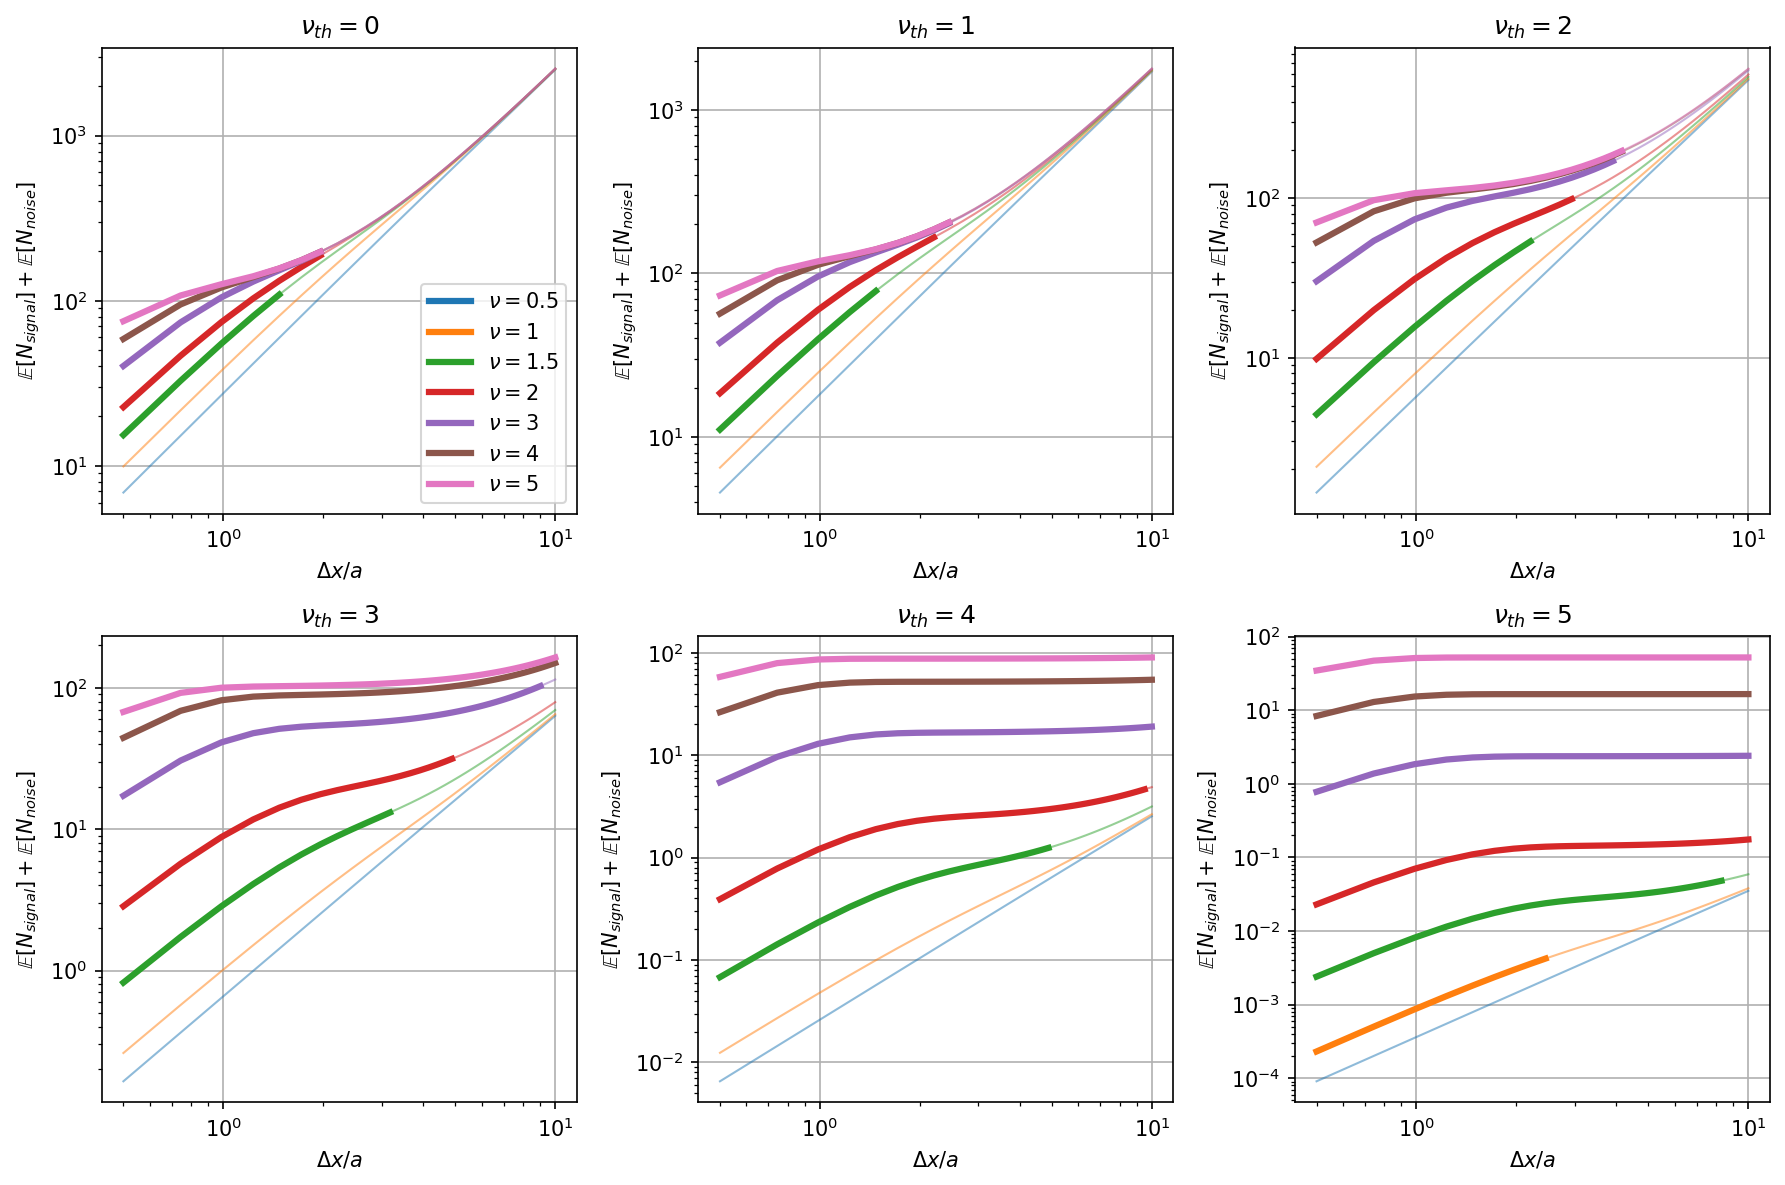

In [503]:
fig = plt.figure(dpi=150, figsize=[12, 8])
axs = np.atleast_1d(fig.subplots(2, 3)).flatten()

for j, nu_th in enumerate(nu_ths):
    plt.sca(axs[j])
    for i, nu in enumerate(nus):
        a = E_signal[nu_th][nu]/E_noise[nu_th]
#         a = (a - a.min()) / (a.max() - a.min())
        plt.plot(
            dxs, 
            (E_signal[nu_th][nu] + E_noise[nu_th]),
            color=f'C{i}',
            alpha=0.5,
            lw=1,
        )
        plt.plot(
            dxs[a >= 1], 
            (E_signal[nu_th][nu] + E_noise[nu_th])[a >= 1],
#             ls='--',
            color=f'C{i}',
            label=r"$\nu = $" + str(nu),
            alpha=1,
            lw=3,
        )
    
#         plt.scatter(
#             dxs,
#             E_signal[nu_th][nu] + E_noise[nu_th], 
#             alpha=a, 
#             label=r"$\nu = $" + str(nu)
#         )

    plt.yscale("log")
    plt.xlabel("$\Delta x / a$")
#     plt.axhline(1, color='k')
    

    plt.ylabel("$\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}]$")
    plt.xscale("log")
#     plt.axhline(10, color='k')
#     plt.title(r"$\nu_{th} = $" + str(nu_th))
    if j == 0:
        plt.legend()
    plt.grid()
    
#     plt.sca(axs[1])    
#     plt.plot(dxs, (10/dxs)**2, color='k', ls='--', alpha=1) # N_false
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.ylabel("$N_{false} / N_{false}(\Delta x = 10a)$")
#     plt.grid()
#     plt.xlabel("$\Delta x / a$")
    
    plt.title(r"$\nu_{th} = $" + str(nu_th))
fig.tight_layout()
plt.show()
#     break

In [308]:
N_noise(0, dxs[2]).cdf(np.arange(N + 1))

array([9.97366941e-01, 9.81727598e-01, 9.35281809e-01, 8.43325202e-01,
       7.06778632e-01, 5.44571990e-01, 3.83997989e-01, 2.47748452e-01,
       1.46589833e-01, 7.98295402e-02, 4.01765378e-02, 1.87653266e-02,
       8.16747495e-03, 3.32539084e-03, 1.27109901e-03, 4.57653015e-04,
       1.55681075e-04, 5.01754747e-05, 1.53609193e-05, 4.47750657e-06,
       1.24534585e-06, 3.31166301e-07, 8.43540782e-08, 2.06163362e-08,
       4.84228391e-09, 1.09461584e-09, 2.38474240e-10, 5.01354513e-11,
       1.01834097e-11, 2.00062189e-12, 3.80584453e-13, 7.01660952e-14,
       1.25455202e-14, 2.22044605e-15, 3.33066907e-16, 1.11022302e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [312]:
Z[0, :]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

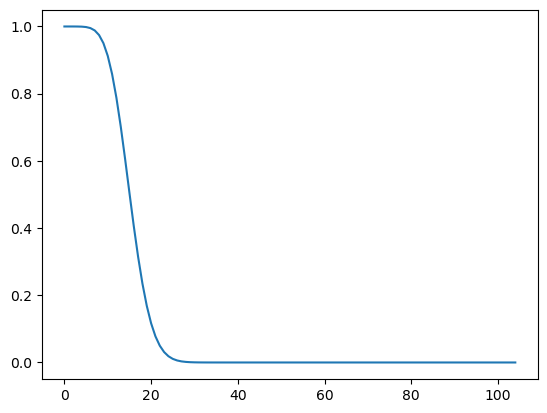

In [340]:
plt.plot(1 - N_noise(3, dxs[-1]).cdf(np.arange(N + 1)))

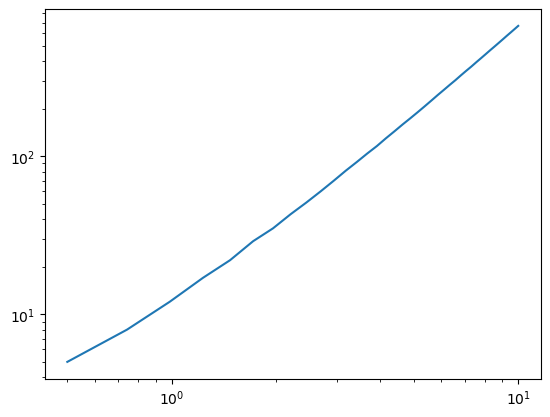

In [400]:
plt.plot(dxs, [N_noise(0, dx).isf(1/100) for dx in dxs])
# plt.yscale("log")
# plt.xscale("log")
# plt.show()

/tmp/ipykernel_105791/1628601194.py:65: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(Y, X, np.log10(Z * 1e6), cmap='gray_r', alpha=1)


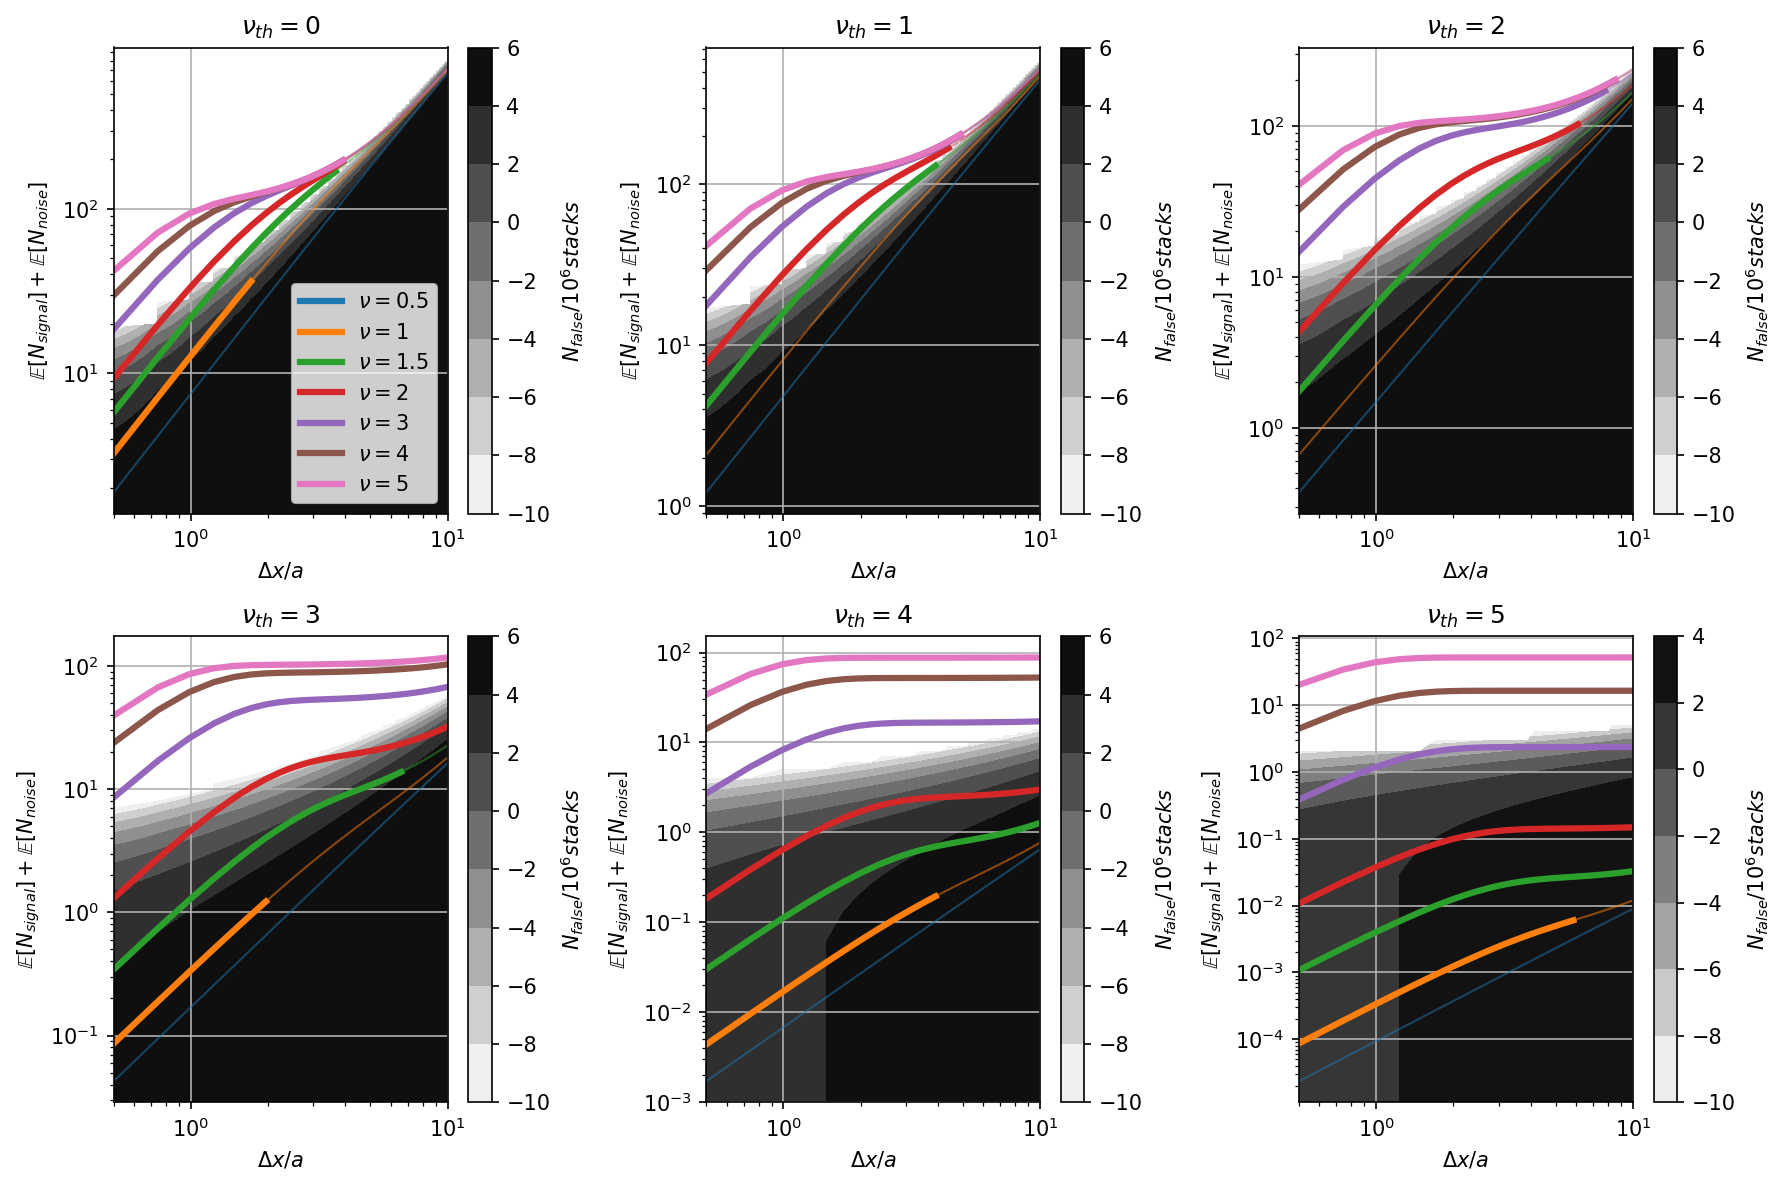

In [419]:
fig = plt.figure(dpi=150, figsize=[12, 8])
axs = np.atleast_1d(fig.subplots(2, 3)).flatten()

for j, nu_th in enumerate(nu_ths):
    plt.sca(axs[j])
    for i, nu in enumerate(nus):
        a = E_signal[nu_th][nu]/E_noise[nu_th]
        plt.plot(
            dxs, 
            (E_signal[nu_th][nu] + E_noise[nu_th]),
            color=f'C{i}',
            alpha=0.5,
            lw=1,
        )
        plt.plot(
            dxs[a >= 1], 
            (E_signal[nu_th][nu] + E_noise[nu_th])[a >= 1],
            color=f'C{i}',
            label=r"$\nu = $" + str(nu),
            alpha=1,
            lw=3,
        )
    

    plt.yscale("log")
    plt.xlabel("$\Delta x / a$")
    

    plt.ylabel("$\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}]$")
    plt.xscale("log")
    if j == 0:
        plt.legend()
    plt.grid()
    

    plt.title(r"$\nu_{th} = $" + str(nu_th))
    
    ylim = plt.ylim()
    
    n = np.arange(int(ylim[1]) + 1)
    X, Y = np.meshgrid(n, dxs)
    Z = np.zeros_like(X, dtype=np.float64)
    for j, dx in enumerate(dxs):
        Z[j] = 1 - N_noise(nu_th, dx).cdf(n)
    
    plt.contourf(Y, X, np.log10(Z * 1e6), cmap='gray_r', alpha=1)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(r"$N_{false} / 10^6 stacks$")
    plt.ylim(*ylim)
    
fig.tight_layout()
plt.show()
#     break

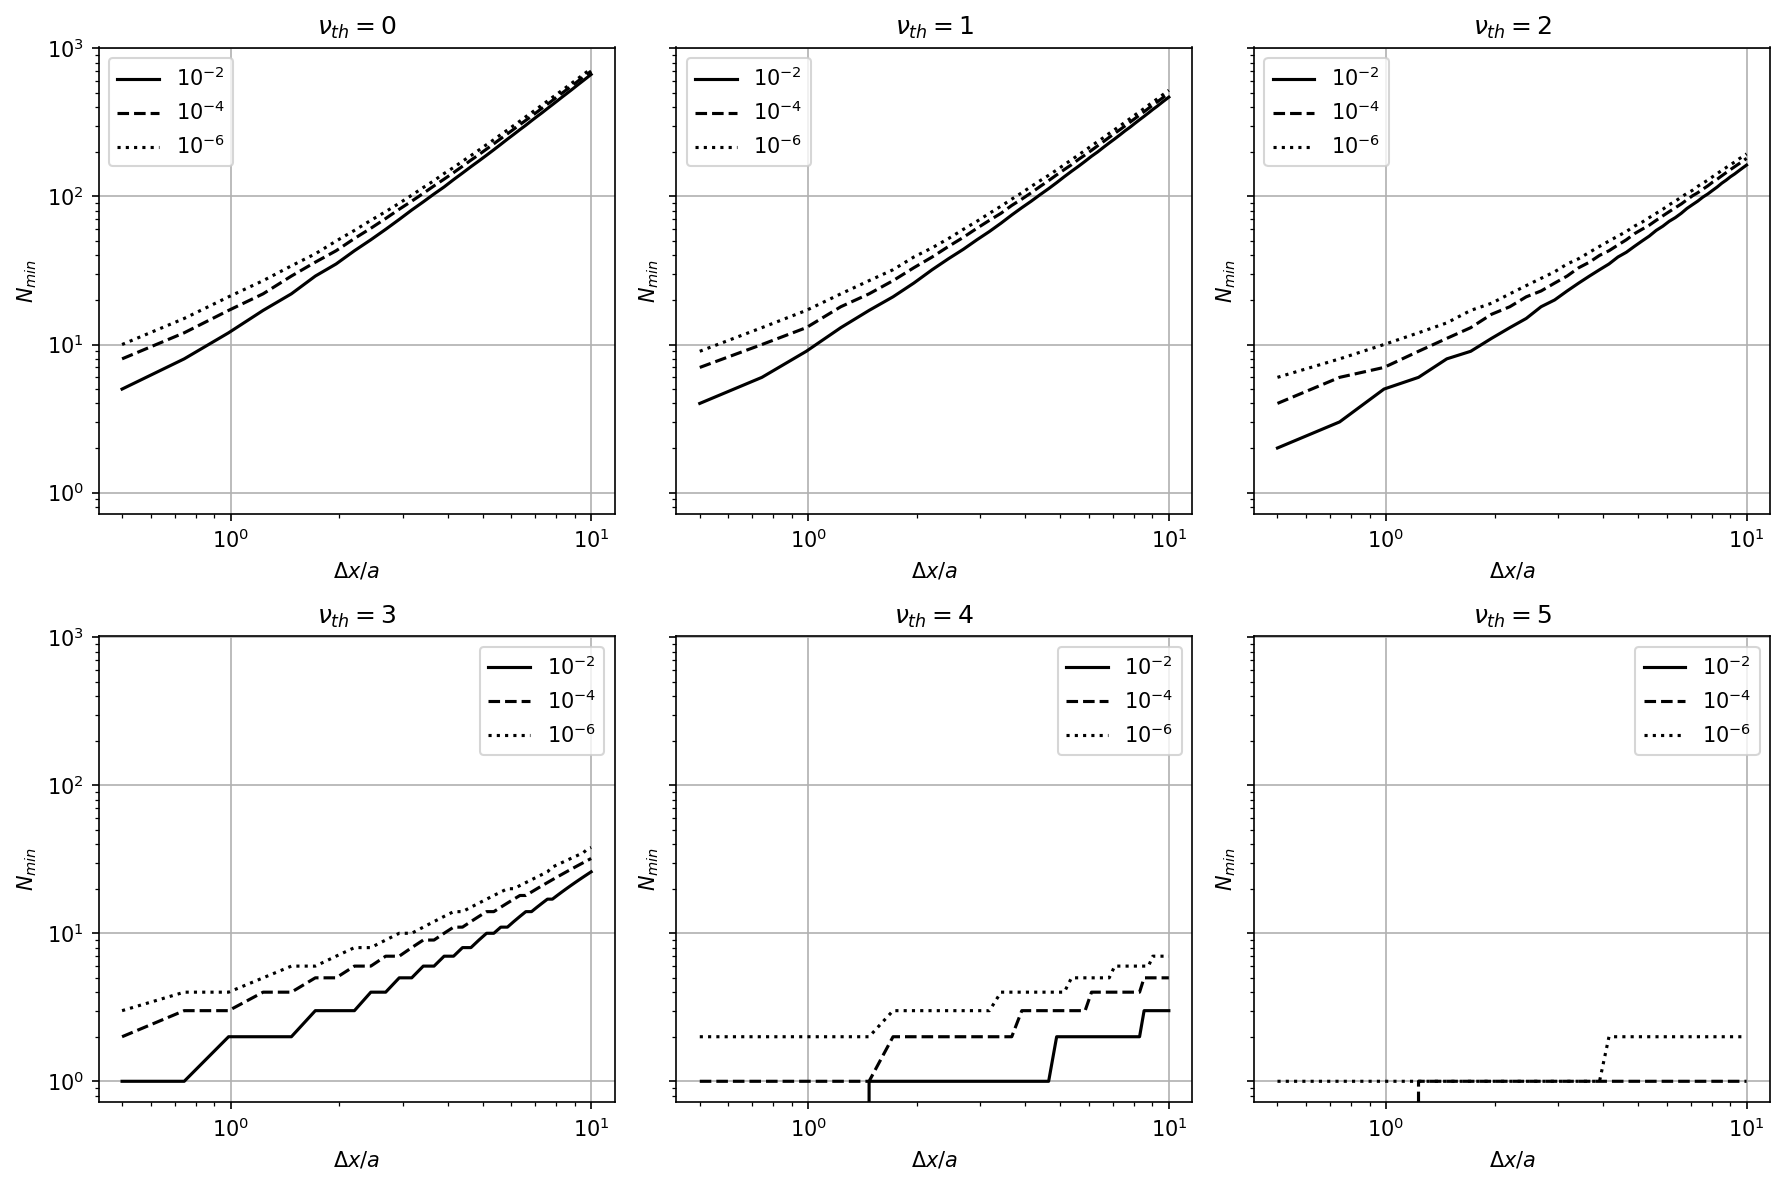

In [415]:
fig = plt.figure(dpi=150, figsize=[12, 8])
axs = np.atleast_1d(fig.subplots(2, 3, sharey=True)).flatten()

for j, nu_th in enumerate(nu_ths):
    plt.sca(axs[j])
#     for i, nu in enumerate(nus):
#         a = E_signal[nu_th][nu]/E_noise[nu_th]
# #         a = (a - a.min()) / (a.max() - a.min())
#         plt.plot(
#             dxs, 
#             (E_signal[nu_th][nu] + E_noise[nu_th]),
#             color=f'C{i}',
#             alpha=0.5,
#             lw=1,
#         )
#         plt.plot(
#             dxs[a >= 1], 
#             (E_signal[nu_th][nu] + E_noise[nu_th])[a >= 1],
# #             ls='--',
#             color=f'C{i}',
#             label=r"$\nu = $" + str(nu),
#             alpha=1,
#             lw=3,
#         )
    
#         plt.scatter(
#             dxs,
#             E_signal[nu_th][nu] + E_noise[nu_th], 
#             alpha=a, 
#             label=r"$\nu = $" + str(nu)
#         )

    plt.yscale("log")
    plt.xlabel("$\Delta x / a$")
#     plt.axhline(1, color='k')
    

    plt.ylabel("$N_{min}$")
    plt.xscale("log")
#     plt.axhline(10, color='k')
#     plt.title(r"$\nu_{th} = $" + str(nu_th))
#     if j == 0:
#         plt.legend()
#     plt.grid()
    
#     plt.sca(axs[1])    
#     plt.plot(dxs, (10/dxs)**2, color='k', ls='--', alpha=1) # N_false
#     plt.yscale("log")
#     plt.xscale("log")
#     plt.ylabel("$N_{false} / N_{false}(\Delta x = 10a)$")
#     plt.grid()
#     plt.xlabel("$\Delta x / a$")
    
    plt.title(r"$\nu_{th} = $" + str(nu_th))
    
    plt.plot(
        dxs, [N_noise(nu_th, dx).isf(1e-2) for dx in dxs], 
        color='k', ls='-', label='$10^{-2}$'
    )
    plt.plot(
        dxs, [N_noise(nu_th, dx).isf(1e-4) for dx in dxs], 
        color='k', ls='--', label="$10^{-4}$"
    )
    plt.plot(
        dxs, [N_noise(nu_th, dx).isf(1e-6) for dx in dxs], 
        color='k', ls=':', label="$10^{-6}$"
    )
    plt.legend()
    plt.grid()
#     ylim = plt.ylim()
    
#     n = np.arange(int(ylim[1]) + 1)
#     X, Y = np.meshgrid(n, dxs)
#     Z = np.zeros_like(X, dtype=np.float64)
#     for j, dx in enumerate(dxs):
#         Z[j] = 1 - N_noise(nu_th, dx).cdf(n)
#         Z[j] = Z[j] * dx**4
    
#     plt.contourf(Y, X, np.log10(Z), cmap='gray_r', alpha=1)
#     cbar = plt.colorbar()
#     cbar.ax.set_ylabel(r"$N_{false}$")
#     plt.ylim(*ylim)
    
fig.tight_layout()
plt.show()
#     break

In [14]:
import astropy.units as u

vmin = 0.1 * u.deg/u.day
vmax = 0.5 * u.deg/u.day
dv_ast = vmax - vmin

vmin = (50*u.pixel * 0.263*u.arcsec/u.pixel)/u.day
vmax = (500*u.pixel * 0.263*u.arcsec/u.pixel)/u.day
dv_tno = vmax - vmin

dt = 4 * u.hour
om = (4096 * u.pixel) * (2048 * u.pixel) * (0.263 * u.arcsec / u.pixel)**2
a = 1 * u.arcsec

N_f_ast = {}
N_f_tno = {}
for nu_th in nu_ths:
    N_f_ast[nu_th] = []
    N_f_tno[nu_th] = []
    for dx in dxs:
        N_stacks = (((dt*dv_ast)**2 * om) / (dx*a)**4).to(u.dimensionless_unscaled)
        N_f_ast[nu_th].append(N_noise(nu_th, dx).isf(100/N_stacks))

        N_stacks = (((dt*dv_tno)**2 * om) / (dx*a)**4).to(u.dimensionless_unscaled)
        N_f_tno[nu_th].append(N_noise(nu_th, dx).isf(100/N_stacks))
    N_f_ast[nu_th] = np.array(N_f_ast[nu_th])
    N_f_tno[nu_th] = np.array(N_f_tno[nu_th])
    
# #     plt.plot(y)

In [18]:
N_noise(3, 1).isf(100)

In [13]:
om.to(u.arcmin**2)

<Quantity 161.17545188 arcmin2>

In [464]:
dx = dxs[-1]
a = 1 * u.arcsec

(((dt*dv_ast)**2 * om) / (dx*a)**4).to(u.dimensionless_unscaled)

<Quantity 3342134.17009152>

In [465]:
dx = dxs[-1]
a = 1 * u.arcsec

(((dt*dv_tno)**2 * om) / (dx*a)**4).to(u.dimensionless_unscaled)

<Quantity 22575.39828233>

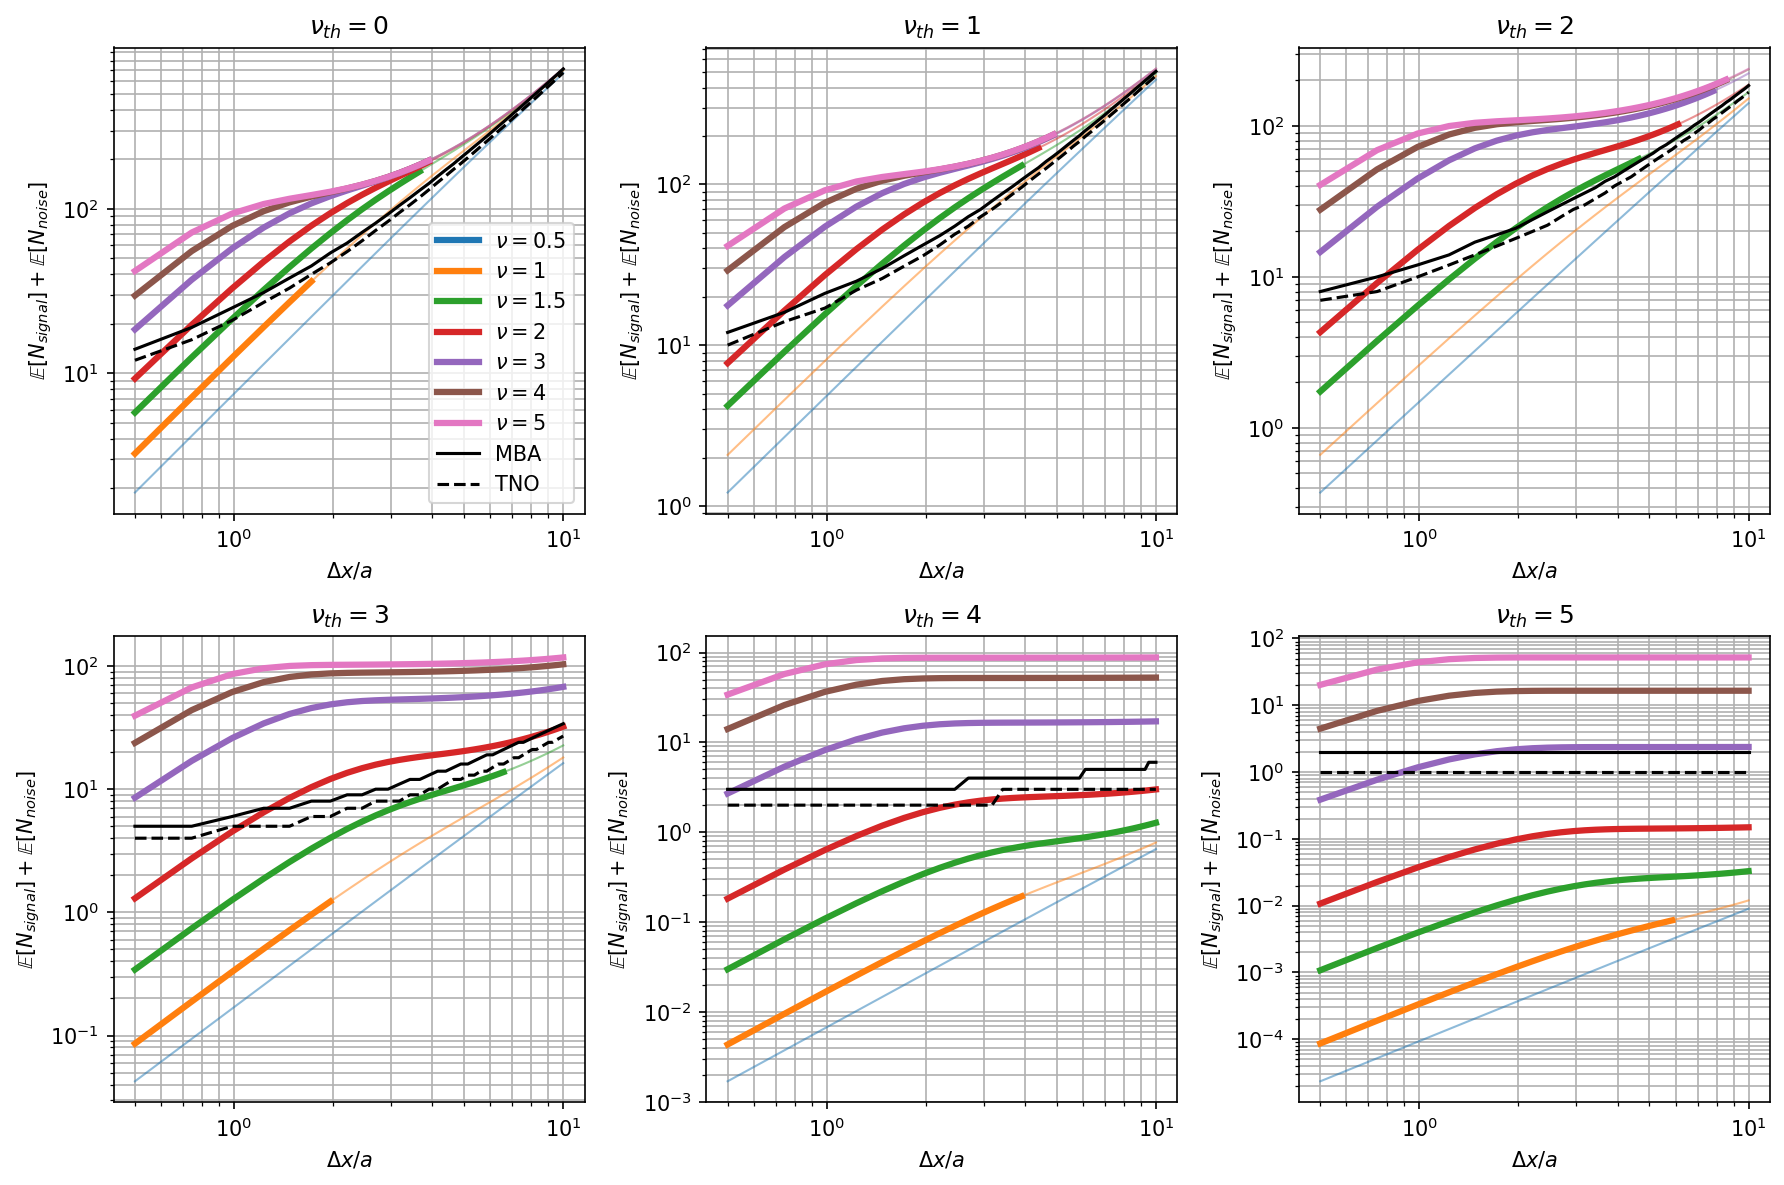

In [19]:
fig = plt.figure(dpi=150, figsize=[12, 8])
axs = np.atleast_1d(fig.subplots(2, 3)).flatten()

for j, nu_th in enumerate(nu_ths):
    plt.sca(axs[j])
    for i, nu in enumerate(nus):
        a = E_signal[nu_th][nu]/E_noise[nu_th]
        plt.plot(
            dxs, 
            (E_signal[nu_th][nu] + E_noise[nu_th]),
            color=f'C{i}',
            alpha=0.5,
            lw=1,
        )
        plt.plot(
            dxs[a >= 1], 
            (E_signal[nu_th][nu] + E_noise[nu_th])[a >= 1],
            color=f'C{i}',
            label=r"$\nu = $" + str(nu),
            alpha=1,
            lw=3,
        )
    

    plt.yscale("log")
    plt.xlabel("$\Delta x / a$")
    

    plt.ylabel("$\mathbb{E}[N_{signal}] + \mathbb{E}[N_{noise}]$")
    plt.xscale("log")
    plt.grid(which='both')

    plt.title(r"$\nu_{th} = $" + str(nu_th))
    
    plt.plot(dxs, N_f_ast[nu_th], color='k', label='MBA')
    plt.plot(dxs, N_f_tno[nu_th], color='k', ls='--', label='TNO')

    if j == 0:
        plt.legend()
    
#     ylim = plt.ylim()
    
#     n = np.arange(int(ylim[1]) + 1)
#     X, Y = np.meshgrid(n, dxs)
#     Z = np.zeros_like(X, dtype=np.float64)
#     for j, dx in enumerate(dxs):
#         Z[j] = 1 - N_noise(nu_th, dx).cdf(n)
    
#     plt.contourf(Y, X, np.log10(Z * 1e6), cmap='gray_r', alpha=1)
#     cbar = plt.colorbar()
#     cbar.ax.set_ylabel(r"$N_{false} / 10^6 stacks$")
#     plt.ylim(*ylim)
    
fig.tight_layout()
# plt.savefig("figures/choose_dx_Nmin.pdf")
# plt.savefig("figures/choose_dx_Nmin.png")
plt.show()
#     break

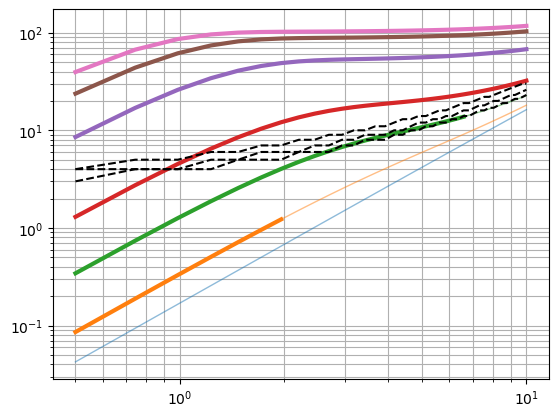

In [32]:
nu_th = 3
for i, nu in enumerate(nus):
    a = E_signal[nu_th][nu]/E_noise[nu_th]
    plt.plot(
        dxs, 
        (E_signal[nu_th][nu] + E_noise[nu_th]),
        color=f'C{i}',
        alpha=0.5,
        lw=1,
    )
    plt.plot(
        dxs[a >= 1], 
        (E_signal[nu_th][nu] + E_noise[nu_th])[a >= 1],
        color=f'C{i}',
        label=r"$\nu = $" + str(nu),
        alpha=1,
        lw=3,
    )
    
vmin = 0.1 * u.deg/u.day
vmax = 0.5 * u.deg/u.day
dv_ast = vmax - vmin

vmin = (50*u.pixel * 0.263*u.arcsec/u.pixel)/u.day
vmax = (500*u.pixel * 0.263*u.arcsec/u.pixel)/u.day
dv_tno = vmax - vmin

dt = 4 * u.hour
om = (4096 * u.pixel) * (2048 * u.pixel) * (0.263 * u.arcsec / u.pixel)**2
a = 1 * u.arcsec

for n in [10, 200, 1e3]:
    y = []
    for dx in dxs:
        N_stacks = (((dt*dv_tno)**2 * om) / (dx*a)**4).to(u.dimensionless_unscaled)
        y.append(N_noise(nu_th, dx).isf(n/N_stacks))
    
#     plt.plot(dxs, N_f_ast[nu_th], color='k', label='MBA')
    plt.plot(dxs, y, color='k', ls='--', label='TNO')


plt.yscale("log")
plt.xscale("log")
plt.grid(which='both')
plt.show()

/tmp/ipykernel_105791/231452682.py:37: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(Y, X, np.log10(Z), cmap='gray', alpha=1)


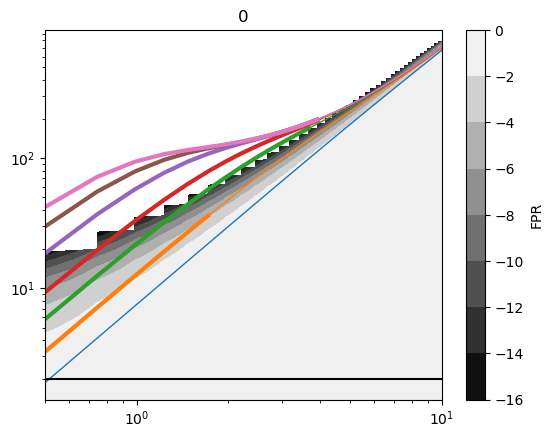

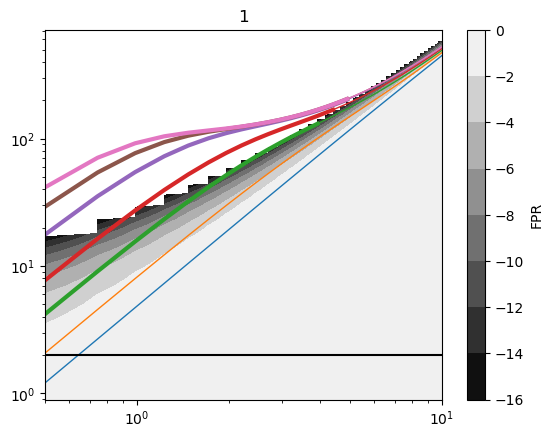

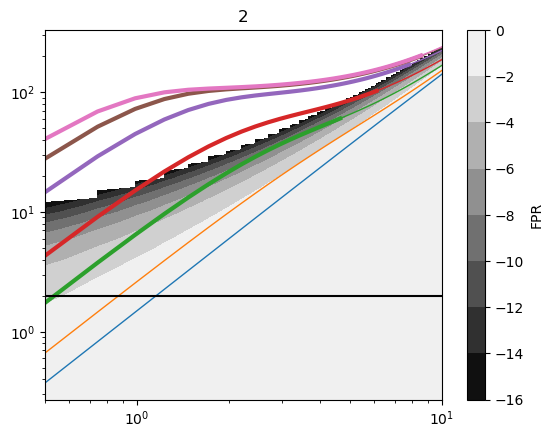

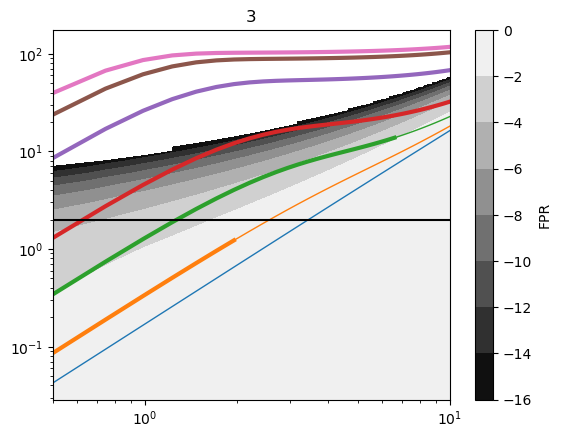

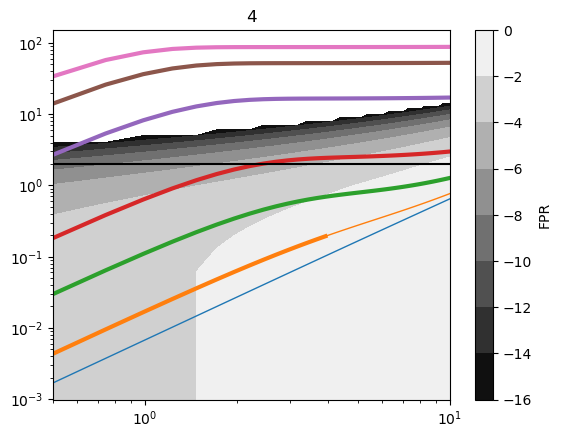

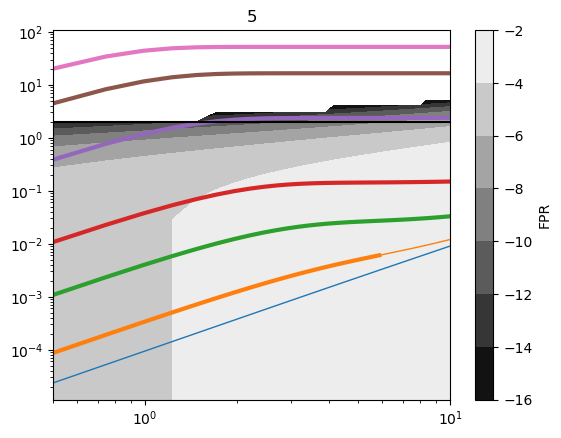

In [378]:
for nu_th in nu_ths:
# nu_th = 3
    #     print(Z[j, :])

    # 1 - N_noise(nu_th, dxs[-1]).cdf(np.arange(N + 1))

    for i, nu in enumerate(nus):
        a = E_signal[nu_th][nu]/E_noise[nu_th]        
        plt.plot(
            dxs, 
            (E_signal[nu_th][nu] + E_noise[nu_th]),
            color=f'C{i}',
            alpha=1,
            lw=1,
        )
        plt.plot(
            dxs[a >= 1], 
            (E_signal[nu_th][nu] + E_noise[nu_th])[a >= 1],
    #             ls='--',
            color=f'C{i}',
            label=r"$\nu = $" + str(nu),
            alpha=1,
            lw=3,
        )

    plt.axhline(2, color='k')
    plt.xscale("log")
    plt.yscale("log")        
    ylim = plt.ylim()
    
    n = np.arange(int(ylim[1]) + 1)
    X, Y = np.meshgrid(n, dxs)
    Z = np.zeros_like(X, dtype=np.float64)
    for j, dx in enumerate(dxs):
        Z[j] = 1 - N_noise(nu_th, dx).cdf(n)
    
    plt.contourf(Y, X, np.log10(Z), cmap='gray', alpha=1)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel("FPR")
    plt.ylim(*ylim)
    plt.title(nu_th)
    plt.show()
#     break

In [293]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

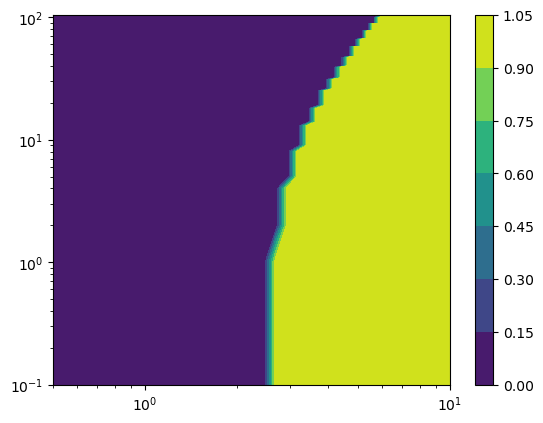

In [272]:
1 - N_noise(3, dxs[0]).cdf(1)

# y = []
# for dx in dxs:
#     y.append()
# for nu_th in nu_ths:
#     plt.plot(dxs, [1 - N_noise(nu_th, dx).cdf(0) for dx in dxs])
# plt.show()

0.0007522197694695976

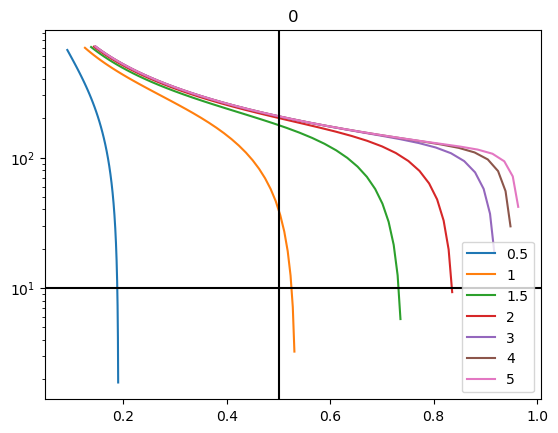

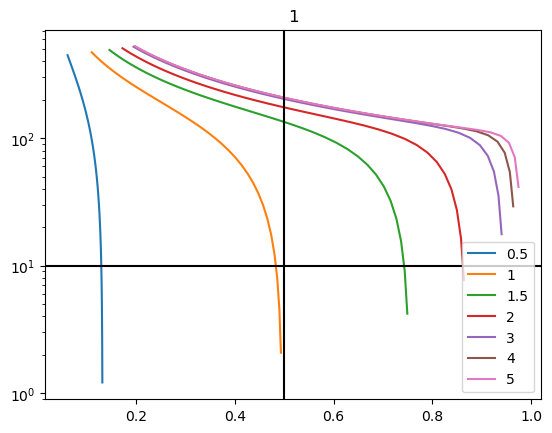

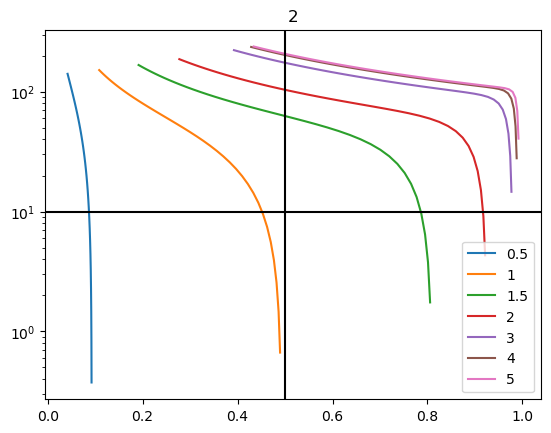

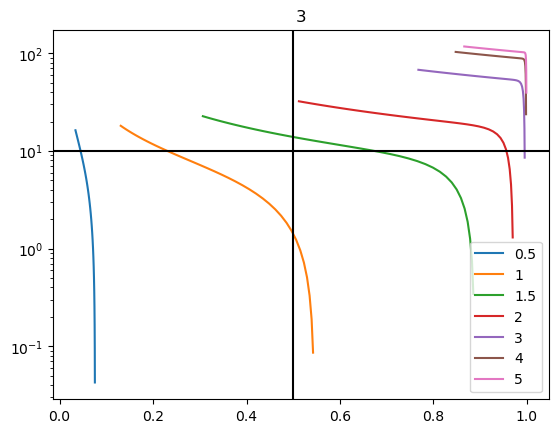

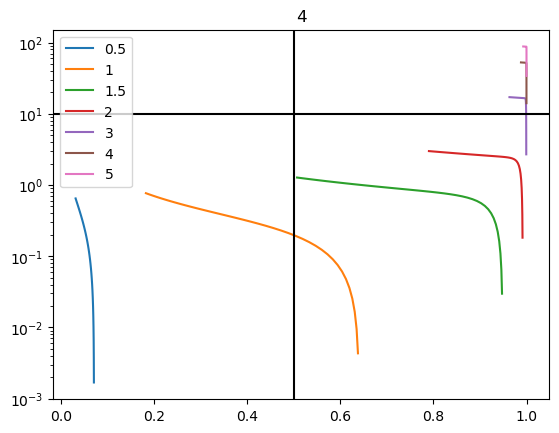

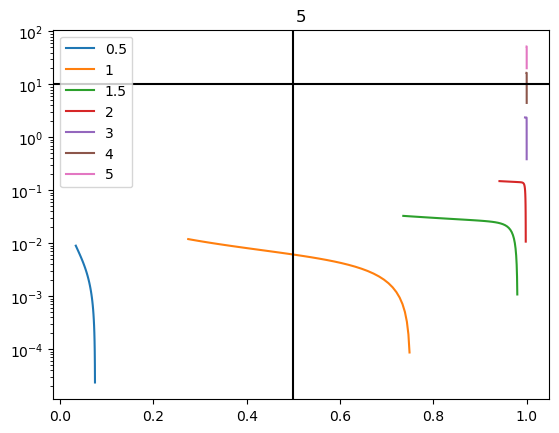

In [181]:
for nu_th in nu_ths:
    for nu in nus:
        plt.plot(E_signal[nu_th][nu]/(E_noise[nu_th] + E_signal[nu_th][nu]), E_signal[nu_th][nu] + E_noise[nu_th], label=nu)

#     plt.xscale("log")
    plt.axvline(0.5, color='k')
    plt.yscale("log")
    plt.axhline(10, color='k')
    plt.title(nu_th)
    plt.legend()
    plt.show()